In [1]:
# Load libraries
library(DiffBind)
library(BiocParallel)
library(dplyr)
library(TxDb.Athaliana.BioMart.plantsmart51)
library(ChIPseeker)

# Set options
options(stringsAsFactors = F)
Fold_cutoff <- 1
FDR_cutoff <- 0.05


Warning message:
“package ‘DiffBind’ was built under R version 4.3.2”
Loading required package: GenomicRanges

Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Loading required package: stats4

Loading required package: BiocGenerics

Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”

Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Warning message:
“package ‘S4Vectors’ was built u

In [2]:
source('../gene_table_and_other_scripts/theme_Publication.R')

Registering fonts with R

aakar already registered with pdfFont().

Abyssinica SIL already registered with pdfFont().

Andale Mono already registered with pdfFont().

Ani already registered with pdfFont().

AnjaliOldLipi already registered with pdfFont().

Arial already registered with pdfFont().

Arial Black already registered with pdfFont().

Chandas already registered with pdfFont().

Comic Sans MS already registered with pdfFont().

Courier New already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Mono already registered with pdfFont().

DejaVu Serif already registered with pdfFont().

Dhurjati already registered with pdfFont().

Droid Sans Fallback already registered with pdfFont().

Dyuthi already registered with pdfFont().

FreeMono already registered with pdfFont().

FreeSans already registered with pdfFont().

FreeSerif already registered with pdfFont().

Gargi already registered with pdfFont().

Garuda already registered with pdfFont(

In [3]:
map_id_name <- read.csv('../gene_table_and_other_scripts/bioMartR_Ath_all_genes_info_googled.csv')
map_id_name <- map_id_name %>% dplyr::rename('gene_name' = 'external_gene_name', 'gene_id' = 'ensembl_gene_id')
sample_n(map_id_name, 2)

gene_id,gene_name
<chr>,<chr>
AT4G05465,AT4G05465
AT2G44910,HB4


In [4]:
library("org.At.tair.db")
library("clusterProfiler")



Warning message:
“package ‘clusterProfiler’ was built under R version 4.3.2”
clusterProfiler v4.10.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:stats’:

    filter




In [5]:
library("ggplot2")

In [6]:
bamReads_DM1_DM2d = list.files("/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam/", pattern = "bam$", full.names = T)
bamReads_DM6_DM7 = list.files("/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/4_intersect_bam/", pattern = "bam$", full.names = T)

In [7]:
# concat bamReads_DM1_DM2d and bamReads_DM6_DM7
bamReads <- c(bamReads_DM1_DM2d, bamReads_DM6_DM7)
bamReads

[1] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//C12A_clean_filtered.bam"
 [2] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//C12B_clean_filtered.bam"
 [3] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//C12C_clean_filtered.bam"
 [4] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//DM1_clean_filtered.bam" 
 [5] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//DM2_clean_filtered.bam" 
 [6] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//DM3_clean_filtered.bam" 
 [7] "/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/4_intersect_bam//C1_L3_clean_filtered.bam"    
 [8] "/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/4_intersect_bam//C2_L3_clean_filtered.bam"    
 [9] "/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/4_intersect_bam//C3_L3_clean_filtered.bam"    
[10] "/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/4_intersect_bam//OK1_L3_clean_filtered.bam"   
[11] "/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/4_intersect_bam//OK2_L3_clean_filtered.bam"   
[12] "/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/4_intersect_bam//OK3_L3_clean_filtered.bam"

In [8]:
Peaks_DM1_DM2d = list.files("/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks_simple/", pattern = 'narrowPeak$', full.names = T)
Peaks_DM6_DM7 = list.files("/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/5_macs2peaks_simple/", pattern = 'narrowPeak$', full.names = T)
#concat Peaks_DM1_DM2d and Peaks_DM6_DM7
Peaks <- c(Peaks_DM1_DM2d, Peaks_DM6_DM7)
Peaks

[1] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks_simple//C12A_clean_filtered_peaks.narrowPeak"
 [2] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks_simple//C12B_clean_filtered_peaks.narrowPeak"
 [3] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks_simple//C12C_clean_filtered_peaks.narrowPeak"
 [4] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks_simple//DM1_clean_filtered_peaks.narrowPeak" 
 [5] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks_simple//DM2_clean_filtered_peaks.narrowPeak" 
 [6] "/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks_simple//DM3_clean_filtered_peaks.narrowPeak" 
 [7] "/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/5_macs2peaks_simple//C1_L3_clean_filtered_peaks.narrowPeak"    
 [8] "/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/5_macs2peaks_simple//C2_L3_clean_filtered_peaks.narrowPeak"    
 [9] "/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/5_macs2peaks_simple//C3_L3_clean_filtered_peaks.narrowPeak"    
[10] "/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/5_macs2peaks_simple//OK1_L3_clean_filtered_peaks.narrowPeak"   
[11] "/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/5_macs2peaks_simple//OK2_L3_clean_filtered_peaks.narrowPeak"   
[12] "/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/5_macs2peaks_simple//OK3_L3_clean_filtered_peaks.narrowPeak"

In [9]:
# Create a sample info data frame
sample_info <- data.frame(
  SampleID = c('C12_1', 'C12_2', 'C12_3', 'DM1-DM2d_1', 'DM1-DM2d_2', 'DM1-DM2d_3',  'C14_1', 'C14_2', 'C14_3', 'DM6-DM7_1', 'DM6-DM7_2', 'DM6-DM7_3'),
    Condition = c('Col-0_12DAS', 'Col-0_12DAS', 'Col-0_12DAS', 'DM1-DM2d', 'DM1-DM2d', 'DM1-DM2d', 'Col-0_14DAS', 'Col-0_14DAS', 'Col-0_14DAS', 'DM6-DM7', 'DM6-DM7', 'DM6-DM7'),
    # Condition = c('12DAS', '12DAS', '12DAS', '12DAS', '12DAS', '12DAS',
    #         '14DAS', '14DAS', '14DAS', '14DAS', '14DAS', '14DAS'),
  # Condition = rep(c('control', 'test', 'control', 'test'), each = 3),
  Replicate = rep(1:3, 4),
  bamReads = bamReads,
  Peaks = Peaks,
  PeakCaller = "narrow",
  stringsAsFactors = F
)


In [10]:
sample_info

SampleID,Condition,Replicate,bamReads,Peaks,PeakCaller
<chr>,<chr>,<int>,<chr>,<chr>,<chr>
C12_1,Col-0_12DAS,1,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//C12A_clean_filtered.bam,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks_simple//C12A_clean_filtered_peaks.narrowPeak,narrow
C12_2,Col-0_12DAS,2,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//C12B_clean_filtered.bam,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks_simple//C12B_clean_filtered_peaks.narrowPeak,narrow
C12_3,Col-0_12DAS,3,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//C12C_clean_filtered.bam,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks_simple//C12C_clean_filtered_peaks.narrowPeak,narrow
DM1-DM2d_1,DM1-DM2d,1,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//DM1_clean_filtered.bam,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks_simple//DM1_clean_filtered_peaks.narrowPeak,narrow
DM1-DM2d_2,DM1-DM2d,2,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//DM2_clean_filtered.bam,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks_simple//DM2_clean_filtered_peaks.narrowPeak,narrow
DM1-DM2d_3,DM1-DM2d,3,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/4_intersect_bam//DM3_clean_filtered.bam,/media/HDD3/bulk_ATAC_DMs/DM1_DM2d_Novogene/X401SC23101639-Z01-F001/Analysi_dir/5_macs2peaks_simple//DM3_clean_filtered_peaks.narrowPeak,narrow
C14_1,Col-0_14DAS,1,/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/4_intersect_bam//C1_L3_clean_filtered.bam,/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/5_macs2peaks_simple//C1_L3_clean_filtered_peaks.narrowPeak,narrow
C14_2,Col-0_14DAS,2,/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/4_intersect_bam//C2_L3_clean_filtered.bam,/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/5_macs2peaks_simple//C2_L3_clean_filtered_peaks.narrowPeak,narrow
C14_3,Col-0_14DAS,3,/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/4_intersect_bam//C3_L3_clean_filtered.bam,/media/HDD3/bulk_ATAC_DMs/N2315964_30-927980316_Lib_2023-09-30/Analysi_dir/5_macs2peaks_simple//C3_L3_clean_filtered_peaks.narrowPeak,narrow


In [11]:
# Import data
dba_meta <- dba(minOverlap = 1, sampleSheet = sample_info)


C12_1   Col-0_12DAS  1 narrow

C12_2   Col-0_12DAS  2 narrow

C12_3   Col-0_12DAS  3 narrow

DM1-DM2d_1   DM1-DM2d  1 narrow

DM1-DM2d_2   DM1-DM2d  2 narrow

DM1-DM2d_3   DM1-DM2d  3 narrow

C14_1   Col-0_14DAS  1 narrow

C14_2   Col-0_14DAS  2 narrow

C14_3   Col-0_14DAS  3 narrow

DM6-DM7_1   DM6-DM7  1 narrow

DM6-DM7_2   DM6-DM7  2 narrow

DM6-DM7_3   DM6-DM7  3 narrow



In [12]:
dba_meta

12 Samples, 69891 sites in matrix:
           ID   Condition Replicate Intervals
1       C12_1 Col-0_12DAS         1     46228
2       C12_2 Col-0_12DAS         2     49335
3       C12_3 Col-0_12DAS         3     45731
4  DM1-DM2d_1    DM1-DM2d         1     51527
5  DM1-DM2d_2    DM1-DM2d         2     51407
6  DM1-DM2d_3    DM1-DM2d         3     50559
7       C14_1 Col-0_14DAS         1     25450
8       C14_2 Col-0_14DAS         2     25696
9       C14_3 Col-0_14DAS         3     28827
10  DM6-DM7_1     DM6-DM7         1     39293
11  DM6-DM7_2     DM6-DM7         2     35793
12  DM6-DM7_3     DM6-DM7         3     73999

In [13]:
# Count reads
## important summits = 0, the default is 200bp, generate minimium peak as 401bp


##time consuming, commnet out, load from rds
# dba_count <- dba.count(dba_meta, minOverlap = 1, bParallel = TRUE, summits = 0)
# dba_count


In [14]:
# Define the base directory as a variable
diffbind_result_dir <- "./diffbind_results_2DM"
# Safely create the directory
if (!dir.exists(diffbind_result_dir)) {
  dir.create(diffbind_result_dir, showWarnings = FALSE, recursive = TRUE)
}

In [15]:
dba_count <- readRDS( file.path(diffbind_result_dir, "dba_count.rds"))

In [16]:
dba_count

12 Samples, 69891 sites in matrix:
           ID   Condition Replicate     Reads FRiP
1       C12_1 Col-0_12DAS         1 139544866 0.66
2       C12_2 Col-0_12DAS         2  98323227 0.67
3       C12_3 Col-0_12DAS         3  81617747 0.67
4  DM1-DM2d_1    DM1-DM2d         1 112096997 0.62
5  DM1-DM2d_2    DM1-DM2d         2 132432208 0.61
6  DM1-DM2d_3    DM1-DM2d         3 117708663 0.63
7       C14_1 Col-0_14DAS         1  57547759 0.66
8       C14_2 Col-0_14DAS         2  57177201 0.66
9       C14_3 Col-0_14DAS         3  60584231 0.66
10  DM6-DM7_1     DM6-DM7         1  77537963 0.63
11  DM6-DM7_2     DM6-DM7         2  78226080 0.64
12  DM6-DM7_3     DM6-DM7         3  55869596 0.68

In [17]:
# Plot heatmap and PCA
pdf(file.path(diffbind_result_dir, "Sample_Cor.pdf"), width = 8, height = 7)
dba.plotHeatmap(dba_count, RowAttributes = DBA_TISSUE, ColAttributes = F)
dba.plotPCA(dba_count)
dev.off()


png 
  2

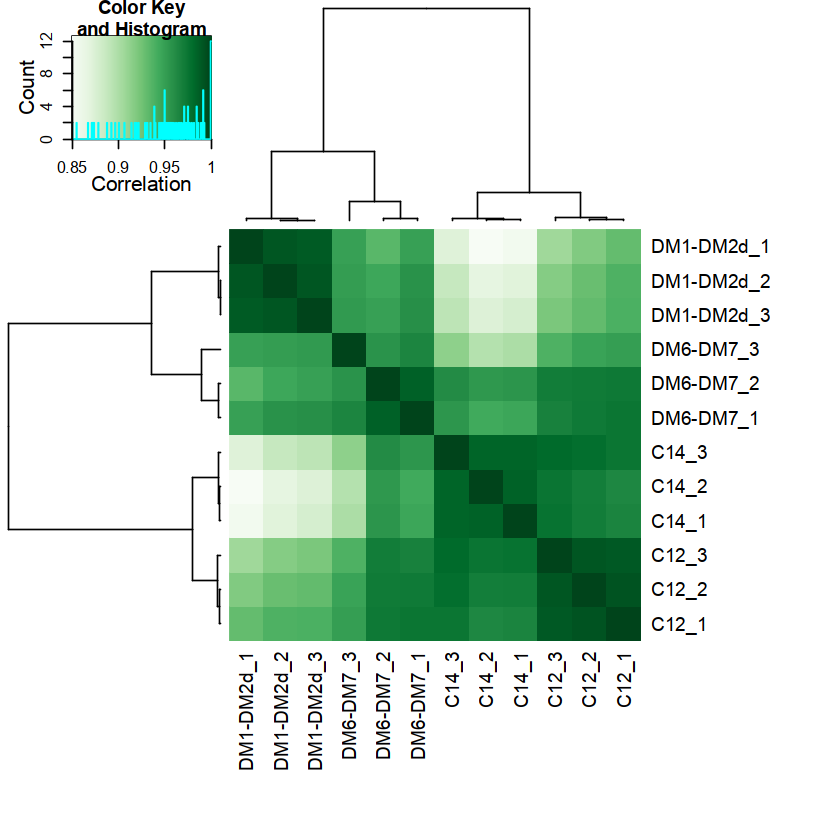

In [18]:
dba.plotHeatmap(dba_count, RowAttributes = DBA_TISSUE, ColAttributes = F)

In [19]:
dba_count

12 Samples, 69891 sites in matrix:
           ID   Condition Replicate     Reads FRiP
1       C12_1 Col-0_12DAS         1 139544866 0.66
2       C12_2 Col-0_12DAS         2  98323227 0.67
3       C12_3 Col-0_12DAS         3  81617747 0.67
4  DM1-DM2d_1    DM1-DM2d         1 112096997 0.62
5  DM1-DM2d_2    DM1-DM2d         2 132432208 0.61
6  DM1-DM2d_3    DM1-DM2d         3 117708663 0.63
7       C14_1 Col-0_14DAS         1  57547759 0.66
8       C14_2 Col-0_14DAS         2  57177201 0.66
9       C14_3 Col-0_14DAS         3  60584231 0.66
10  DM6-DM7_1     DM6-DM7         1  77537963 0.63
11  DM6-DM7_2     DM6-DM7         2  78226080 0.64
12  DM6-DM7_3     DM6-DM7         3  55869596 0.68

In [20]:
dba_count <- dba.normalize(dba_count)
norm <- dba.normalize(dba_count, bRetrieve=TRUE)
norm
# dba_diff <- dba.analyze(dba_count)

$norm.method
[1] "lib"

$norm.factors
 [1] 1.5669419 1.1040663 0.9164814 1.2587312 1.4870743 1.3217443 0.6462007
 [8] 0.6420398 0.6802971 0.8706697 0.8783965 0.6273567

$lib.method
[1] "full"

$lib.sizes
 [1] 139544866  98323227  81617747 112096997 132432208 117708663  57547759
 [8]  57177201  60584231  77537963  78226080  55869596

$control.subtract
[1] TRUE

$filter.value
[1] 1

In [21]:
normlibs <- cbind(FullLibSize=norm$lib.sizes, NormFacs=norm$norm.factors, NormLibSize=round(norm$lib.sizes/norm$norm.factors))
# rownames(normlibs) <- info$ID
normlibs

FullLibSize,NormFacs,NormLibSize
139544866,1.5669419,89055545
98323227,1.1040663,89055545
81617747,0.9164814,89055545
112096997,1.2587312,89055545
132432208,1.4870743,89055545
117708663,1.3217443,89055545
57547759,0.6462007,89055545
57177201,0.6420398,89055545
60584231,0.6802971,89055545
77537963,0.8706697,89055545


In [22]:
# Clearing existing contrasts
dba_count$contrasts <- NULL

# Setting new design and contrasts
dba <- dba.contrast(dba_count)
dba


Computing results names...

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



12 Samples, 69891 sites in matrix:
           ID   Condition Replicate     Reads FRiP
1       C12_1 Col-0_12DAS         1 139544866 0.66
2       C12_2 Col-0_12DAS         2  98323227 0.67
3       C12_3 Col-0_12DAS         3  81617747 0.67
4  DM1-DM2d_1    DM1-DM2d         1 112096997 0.62
5  DM1-DM2d_2    DM1-DM2d         2 132432208 0.61
6  DM1-DM2d_3    DM1-DM2d         3 117708663 0.63
7       C14_1 Col-0_14DAS         1  57547759 0.66
8       C14_2 Col-0_14DAS         2  57177201 0.66
9       C14_3 Col-0_14DAS         3  60584231 0.66
10  DM6-DM7_1     DM6-DM7         1  77537963 0.63
11  DM6-DM7_2     DM6-DM7         2  78226080 0.64
12  DM6-DM7_3     DM6-DM7         3  55869596 0.68

Design: [~Condition] | 6 Contrasts:
     Factor       Group Samples      Group2 Samples2
1 Condition Col-0_12DAS       3    DM1-DM2d        3
2 Condition Col-0_12DAS       3 Col-0_14DAS        3
3 Condition Col-0_12DAS       3     DM6-DM7        3
4 Condition    DM1-DM2d       3 Col-0_14DAS        3


In [23]:
dba <- dba.analyze(dba_count, method=DBA_DESEQ2)


Applying Blacklist/Greylists...

No genome detected.

Forming default model design and contrast(s)...

Computing results names...

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

Analyzing...

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. 

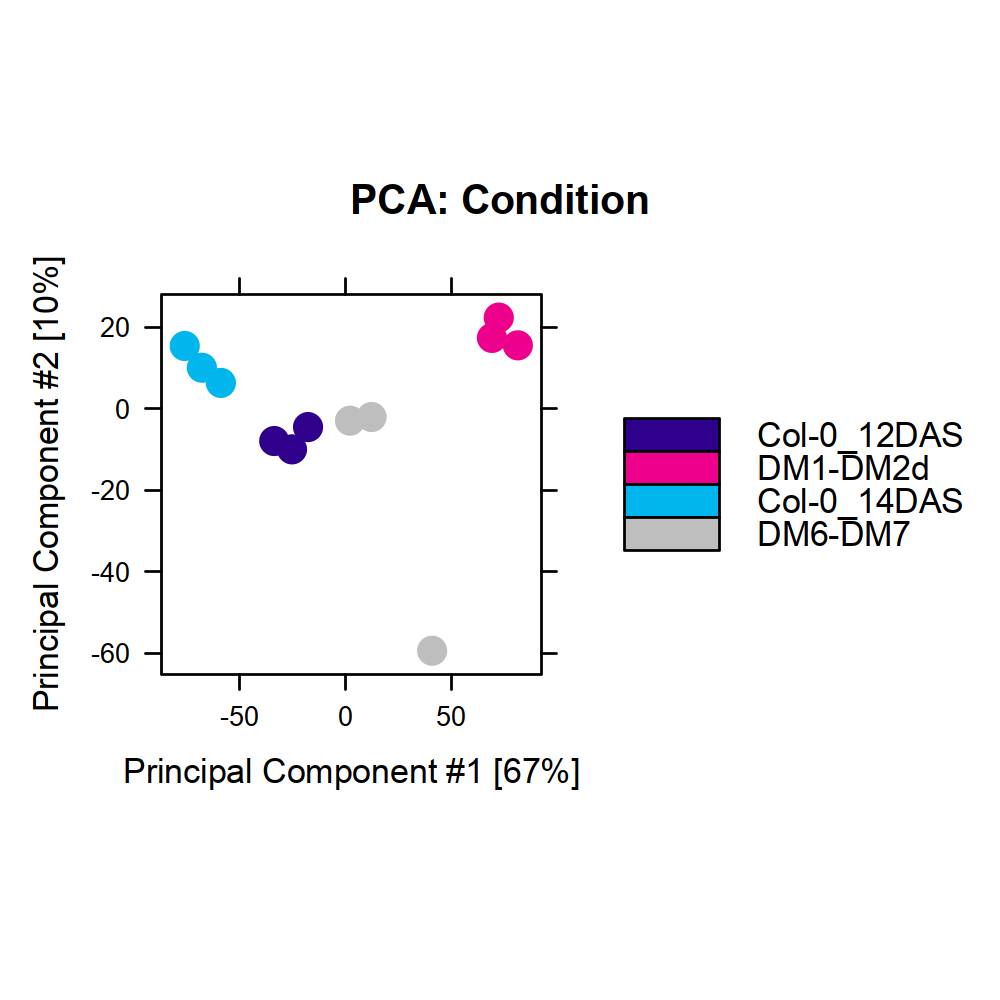

In [24]:
options(repr.plot.width= 5, repr.plot.height= 5, repr.plot.res = 200)
dba.plotPCA(dba, returnData=TRUE)

In [25]:
# Ensure that dba is your DiffBind object after dba.count has been called

# Retrieve the normalized count matrix
counts <- dba$binding

# Depending on the structure of your 'dba' object, you might need to select only the columns with the count data
# For example, if counts is a matrix where rows are peaks and columns are samples:
count_matrix <- as.matrix(counts[, 4:ncol(counts)]) # Adjust the index 4 to where sample count columns start

# Perform PCA on the counts matrix
pca_results <- prcomp(t(count_matrix), scale. = TRUE)

# The PCA scores are now in pca_results$x
pca_scores <- pca_results$x

# Now you can use these scores with ggplot2 to create a custom PCA plot
library(ggplot2)

# You might want to join the PCA scores with the sample metadata
# Assuming dba$samples contains the sample metadata
sample_info <- dba$samples[, c("SampleID", "Condition")]

# Create a data frame for ggplot2 with the PCA scores and the sample information
pca_data <- data.frame(SampleID = colnames(count_matrix), pca_scores)
pca_data <- merge(pca_data, sample_info, by.x='SampleID', by.y='SampleID')



In [26]:
pca_results %>% str

List of 5
 $ sdev    : num [1:12] 188.7 96.1 79.9 60.8 55.9 ...
 $ rotation: num [1:69891, 1:12] -0.001565 -0.004528 -0.00126 -0.000377 -0.003958 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:69891] "1" "2" "3" "4" ...
  .. ..$ : chr [1:12] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:69891] 321 894 1025 171 813 ...
  ..- attr(*, "names")= chr [1:69891] "1" "2" "3" "4" ...
 $ scale   : Named num [1:69891] 48.8 178.9 76 39.8 105.2 ...
  ..- attr(*, "names")= chr [1:69891] "1" "2" "3" "4" ...
 $ x       : num [1:12, 1:12] -29.6 -49.5 -82.5 255.6 201.6 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:12] "C12_1" "C12_2" "C12_3" "DM1-DM2d_1" ...
  .. ..$ : chr [1:12] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [27]:
rownames(sample_info) <- sample_info$SampleID

In [28]:
p <- PCAtools::pca(count_matrix, metadata = sample_info, removeVar = 0.1)

-- removing the lower 10% of variables based on variance



In [29]:
p_for_plot <- p$rotated %>% cbind(p$metadata) 

In [30]:
library(stringr)

In [31]:
p_for_plot <- p_for_plot %>% mutate(Condition = Condition %>% str_replace("DAS", "") )

In [32]:
p$variance[1]

PC1 
45.85203

In [33]:
p_for_plot <- p_for_plot %>%
  mutate_if(is.double, function(x) x / 1000)
p_for_plot

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,SampleID,Condition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
C12_1,-30.91484,72.891306,7.1555670,11.950649,4.5565923,-2.03932974,2.2593098,8.7890559,0.06591303,1.62663002,-0.54009770,9.544576e-14,C12_1,Col-0_12
C12_2,-41.16985,67.694121,-6.2157456,2.986482,-0.1167123,-0.37822231,0.7884601,-8.8305225,-5.95229620,0.29836093,1.33059496,9.544576e-14,C12_2,Col-0_12
C12_3,-36.69806,40.284259,-0.6301844,-3.162712,-11.2799848,4.24793623,-3.9150101,-0.3945115,7.15638329,-2.24284126,-0.55263927,9.544576e-14,C12_3,Col-0_12
DM1-DM2d_1,66.86749,20.140495,13.6322153,-3.355727,6.1414992,-0.09204409,1.2304114,-1.4312926,0.24129406,-7.30012416,-4.18610224,9.544576e-14,DM1-DM2d_1,DM1-DM2d
DM1-DM2d_2,66.33715,7.640151,18.2985355,-4.498326,0.4778535,0.91596653,-0.3278353,0.9349256,0.68656820,0.04800212,8.29920664,9.544576e-14,DM1-DM2d_2,DM1-DM2d
DM1-DM2d_3,62.36823,6.677435,15.9618015,-7.803222,-5.2259929,-0.89516062,-0.8619967,-0.4254630,-1.55366564,7.34172805,-4.17420712,9.544576e-14,DM1-DM2d_3,DM1-DM2d
C14_1,-48.54822,-40.025212,11.7139509,-6.370053,-0.5118581,-13.78251875,-0.7650000,-0.6376033,1.53835828,-0.93883486,0.43310950,9.544576e-14,C14_1,Col-0_14
C14_2,-52.63729,-47.515164,13.6391005,-8.281405,-0.5803371,6.44149947,10.4738890,0.7887780,-0.80051195,0.01939090,-0.17521906,9.544576e-14,C14_2,Col-0_14
C14_3,-44.35702,-35.891196,7.2429787,-4.020888,9.4650499,5.64920001,-9.8677413,0.6403197,-1.38531208,1.11600010,-0.44143174,9.544576e-14,C14_3,Col-0_14


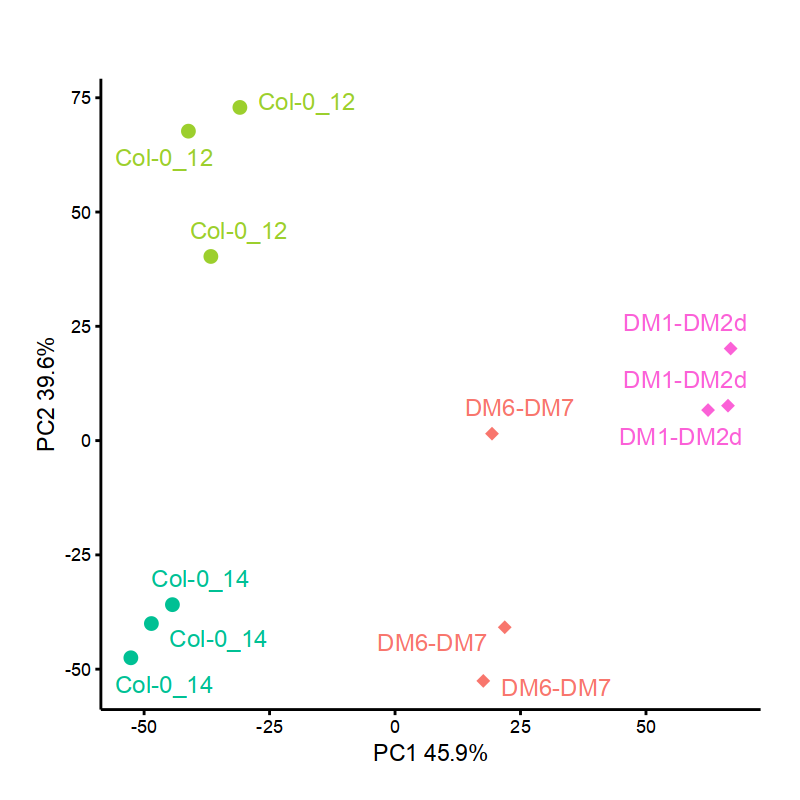

In [34]:
library(ggplot2)
library(ggrepel)

width_ <- 4
height_ <- 4
options(repr.plot.width= width_, repr.plot.height= height_, repr.plot.res = 200)
# Define custom shapes and colors if needed
custom_shapes <- c(16, 16, 18, 18)  # Replace with your actual shapes
custom_colors <- c( "DM6-DM7" = "#F8766D", 'DM1-DM2d' = '#FB61D7', 
                   'Col-0_12' = '#9ccf2d', 'Col-0_14' = '#00C094')  # Replace with your actual colors

# Assuming pca_data is your dataframe
pca_plot <- ggplot(p_for_plot, aes(x = PC1, y = PC2, color = Condition, shape = Condition)) +
  geom_point(size = 2) +
  xlab(paste0("PC1 ", round(p$variance[1], 1), "%")) + 
  # Add y-axis label
  ylab(paste0("PC2 ", round(p$variance[2], 1), "%")) + 
  geom_text_repel(
    aes(label = Condition),
    size = 3,
    box.padding = unit(0.35, "lines"),
    point.padding = unit(0.5, "lines")
  ) +
  scale_shape_manual(values = custom_shapes) +
  scale_color_manual(values = custom_colors) +
  theme_minimal() + theme_Arial_8()+
  theme(legend.position = "none") 
  # labs(title = "PCA Plot", x = "Principal Component 1", y = "Principal Component 2")

# Print the plot
print(pca_plot)

# Save the plot
ggsave("./plots/pca_custom_plot.pdf", pca_plot, width = width_, height = height_)


In [35]:
# Save the plot
ggsave("./plots/pca_custom_plot_small.pdf", pca_plot, width = 2.8, height = 2.8)

In [36]:
Res_DM6_DM7 <- dba.report(dba, contrast = 6)  # '6' is based on the row number in your contrasts data frame
Res_DM1_DM2d <- dba.report(dba, contrast = 1, bFlip = TRUE) ## reverse foldchange

In [37]:
# Generate MA plot
pdf(file.path(diffbind_result_dir, "MAplot.pdf"))
dba.plotMA(dba, fold = Fold_cutoff, cex.main = 0.8)
abline(h = c(-Fold_cutoff, Fold_cutoff), col = "#ec008c", lty = 5)
dev.off()


png 
  2

In [38]:
# Generate report and annotate peaks
dba_report_DM1_DM2d <- dba.report(dba, contrast = 1, bFlip = TRUE)
dba_report_DM6_DM7 <- dba.report(dba, contrast = 6)
peakAnno_DM1_DM2d <- annotatePeak(dba_report_DM1_DM2d, TxDb = TxDb.Athaliana.BioMart.plantsmart51, level = "gene")
peakAnno_DM6_DM7 <- annotatePeak(dba_report_DM6_DM7, TxDb = TxDb.Athaliana.BioMart.plantsmart51, level = "gene")

#ignore any peaks that are too far away to the TSS
peakAnno_tb_DM1_DM2d <- as_tibble(peakAnno_DM1_DM2d@anno) %>% filter( distanceToTSS %>% abs() < 20000 )
peakAnno_tb_DM6_DM7 <- as_tibble(peakAnno_DM6_DM7@anno) %>% filter( distanceToTSS %>% abs() < 20000 )

distal_peakAnno_tb_DM1_DM2d <- as_tibble(peakAnno_DM1_DM2d@anno)  %>% filter( distanceToTSS %>% abs() >= 20000 )
distal_peakAnno_tb_DM6_DM7 <- as_tibble(peakAnno_DM6_DM7@anno)  %>% filter( distanceToTSS %>% abs() >= 20000 )

>> preparing features information...		 2024-09-25 09:49:16 
>> identifying nearest features...		 2024-09-25 09:49:16 
>> calculating distance from peak to TSS...	 2024-09-25 09:49:16 
>> assigning genomic annotation...		 2024-09-25 09:49:16 
>> assigning chromosome lengths			 2024-09-25 09:49:19 
>> done...					 2024-09-25 09:49:19 
>> preparing features information...		 2024-09-25 09:49:19 
>> identifying nearest features...		 2024-09-25 09:49:19 
>> calculating distance from peak to TSS...	 2024-09-25 09:49:20 
>> assigning genomic annotation...		 2024-09-25 09:49:20 
>> assigning chromosome lengths			 2024-09-25 09:49:20 
>> done...					 2024-09-25 09:49:20 


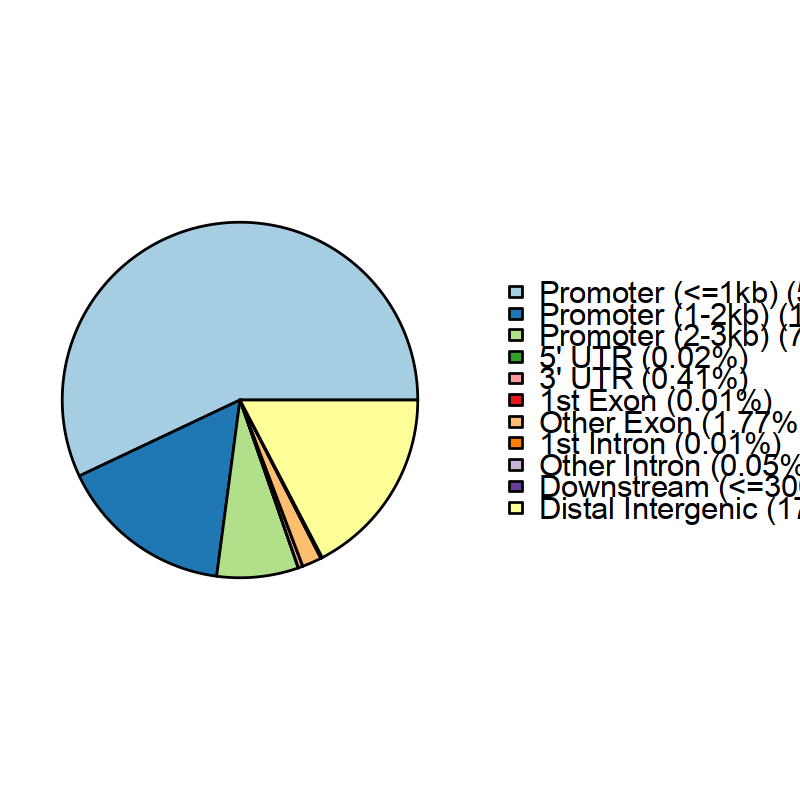

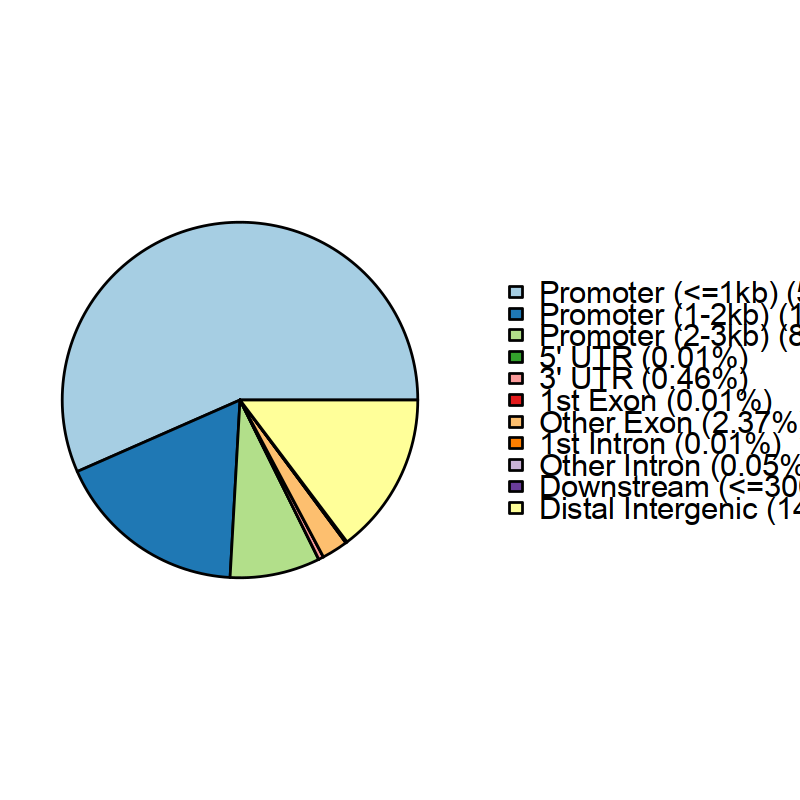

In [39]:
plotAnnoPie(peakAnno_DM1_DM2d)
plotAnnoPie(peakAnno_DM6_DM7)

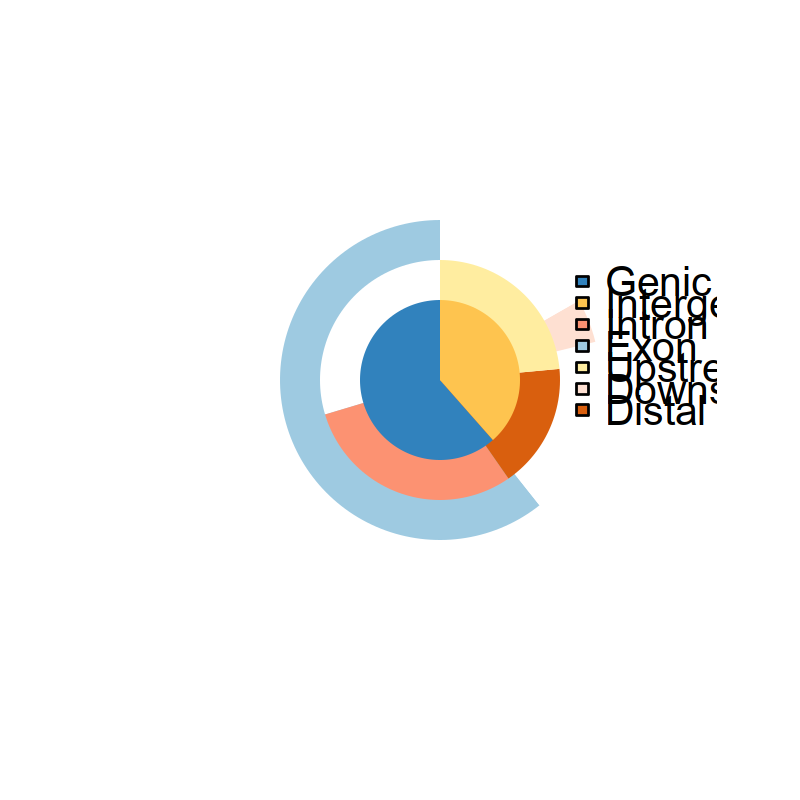

In [40]:
vennpie(peakAnno_DM1_DM2d)

In [41]:
peakAnno_DM1_DM2d

Annotated peaks generated by ChIPseeker
33051/33051  peaks were annotated
Genomic Annotation Summary:
              Feature    Frequency
9    Promoter (<=1kb) 57.027018850
10   Promoter (1-2kb) 15.872439563
11   Promoter (2-3kb)  7.415811927
4              5' UTR  0.015128135
3              3' UTR  0.414510907
1            1st Exon  0.006051254
7          Other Exon  1.769991831
2          1st Intron  0.006051254
8        Other Intron  0.051435660
6  Downstream (<=300)  0.084717558
5   Distal Intergenic 17.336843061

In [42]:
peakAnno_tb_DM1_DM2d %>% write.csv( file = file.path(diffbind_result_dir, "DiffPeakAnno_DM1_DM2d.csv"), row.names = FALSE)

peakAnno_tb_DM6_DM7 %>% write.csv( file = file.path(diffbind_result_dir, "DiffPeakAnno_DM6_DM7.csv"), row.names = FALSE)

In [43]:
names(peakAnno_tb_DM1_DM2d)

[1] "seqnames"         "start"            "end"              "width"           
 [5] "strand"           "Conc"             "Conc_DM1.DM2d"    "Conc_Col.0_12DAS"
 [9] "Fold"             "p.value"          "FDR"              "annotation"      
[13] "geneChr"          "geneStart"        "geneEnd"          "geneLength"      
[17] "geneStrand"       "geneId"           "distanceToTSS"

In [44]:
library(EnhancedVolcano)

In [45]:
peakAnno_tb_DM6_DM7_map <- peakAnno_tb_DM6_DM7 %>% left_join(map_id_name, by =c('geneId' = 'gene_id'))
peakAnno_tb_DM1_DM2d_map <- peakAnno_tb_DM1_DM2d %>% left_join(map_id_name, by =c('geneId' = 'gene_id'))

In [46]:
peakAnno_tb_DM6_DM7_map %>% filter( p.value < 0.05, Fold > 1) %>% nrow
peakAnno_tb_DM6_DM7_map %>% filter( p.value < 0.05, Fold < -1)  %>% nrow

[1] 16

[1] 390

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


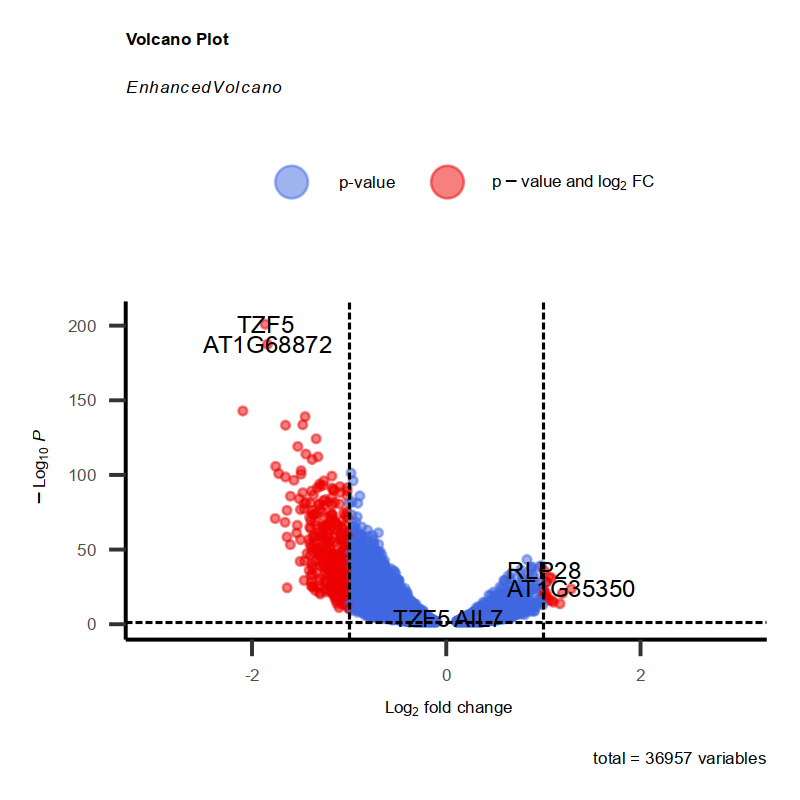

In [47]:
volcano_DM6_DM7 <- EnhancedVolcano(peakAnno_tb_DM6_DM7_map,
                lab = peakAnno_tb_DM6_DM7_map$gene_name,
                x = 'Fold',
                y = 'p.value',
                xlim = c(-3, 3),
                title = 'Volcano Plot',
                pCutoff = 0.05,
                FCcutoff = 1.0,
                pointSize = 1.0,
                labSize = 3.0, 
                  axisLabSize = 6,  # Font size for axis labels
                  titleLabSize = 6,  # Font size for the title
                  subtitleLabSize = 6,  # Font size for the subtitle
                  captionLabSize = 6,  # Font size for the caption
                  legendLabSize = 6,  # Font size for legend labels
                selectLab = c('TZF5', 'AT1G68872', 'RLP28', 'AIL7', 'AT1G35350' ),
                                   raster = TRUE
                                  ) +   theme(
  axis.line = element_line(size = 0.5),       # Adjust axis line thickness
  axis.ticks = element_line(size = 0.5),      # Adjust tick mark thickness
    panel.grid.major = element_blank(),  # Remove major gridlines
    panel.grid.minor = element_blank(),  # Remove minor gridlines
    panel.background = element_blank()   # Remove panel background

  )
volcano_DM6_DM7

Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”


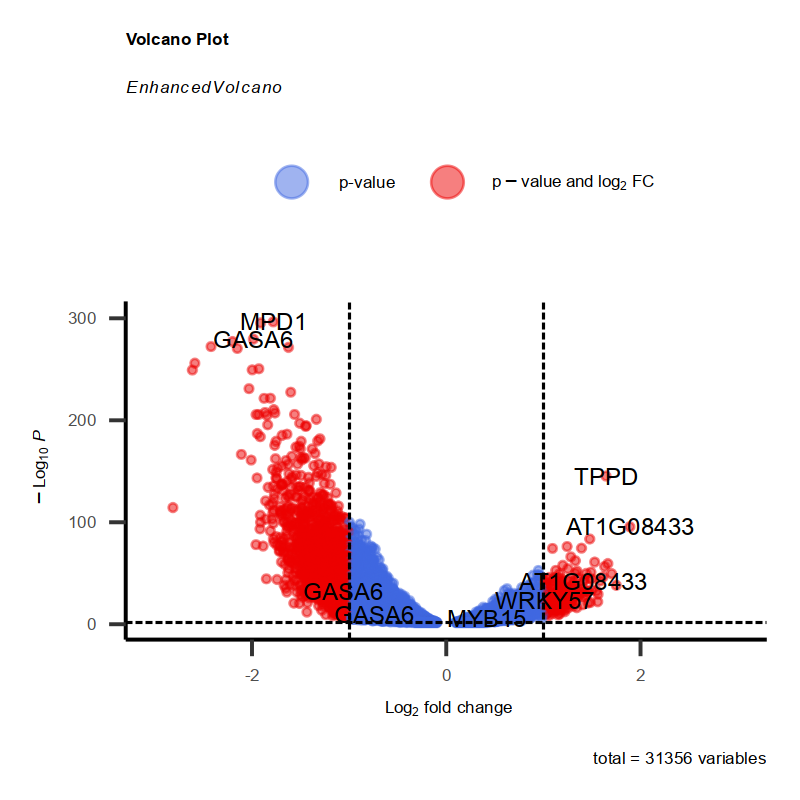

In [48]:
volcano_DM1_DM2d <- EnhancedVolcano(peakAnno_tb_DM1_DM2d_map,
                lab = peakAnno_tb_DM1_DM2d_map$gene_name,
                x = 'Fold',
                y = 'p.value',
                xlim = c(-3, 3),
                title = 'Volcano Plot',
                pCutoff = 0.05,
                FCcutoff = 1.0,
                pointSize = 1.0,
                labSize = 3.0, 
                  axisLabSize = 6,  # Font size for axis labels
                  titleLabSize = 6,  # Font size for the title
                  subtitleLabSize = 6,  # Font size for the subtitle
                  captionLabSize = 6,  # Font size for the caption
                  legendLabSize = 6,  # Font size for legend labels
                selectLab = c('TPPD', 'AT1G08433', 'MYB15', 'WRKY57', 'MPD1', 'GASA6' ),
                                    raster = TRUE
                                      
                                   ) +   theme(
  axis.line = element_line(size = 0.5),       # Adjust axis line thickness
  axis.ticks = element_line(size = 0.5),      # Adjust tick mark thickness
    panel.grid.major = element_blank(),  # Remove major gridlines
    panel.grid.minor = element_blank(),  # Remove minor gridlines
    panel.background = element_blank()   # Remove panel background

  )
volcano_DM1_DM2d

In [49]:
volcano_width <- 2.9
volcano_height <- 4
pdf(file.path(diffbind_result_dir, "VolcanoPlot_DM1_DM2d.pdf"), width = volcano_width, height = volcano_height)
volcano_DM1_DM2d 
dev.off()
pdf(file.path(diffbind_result_dir, "VolcanoPlot_DM6_DM7.pdf"), width = volcano_width, height = volcano_height)
volcano_DM6_DM7
dev.off()


png 
  2

png 
  2

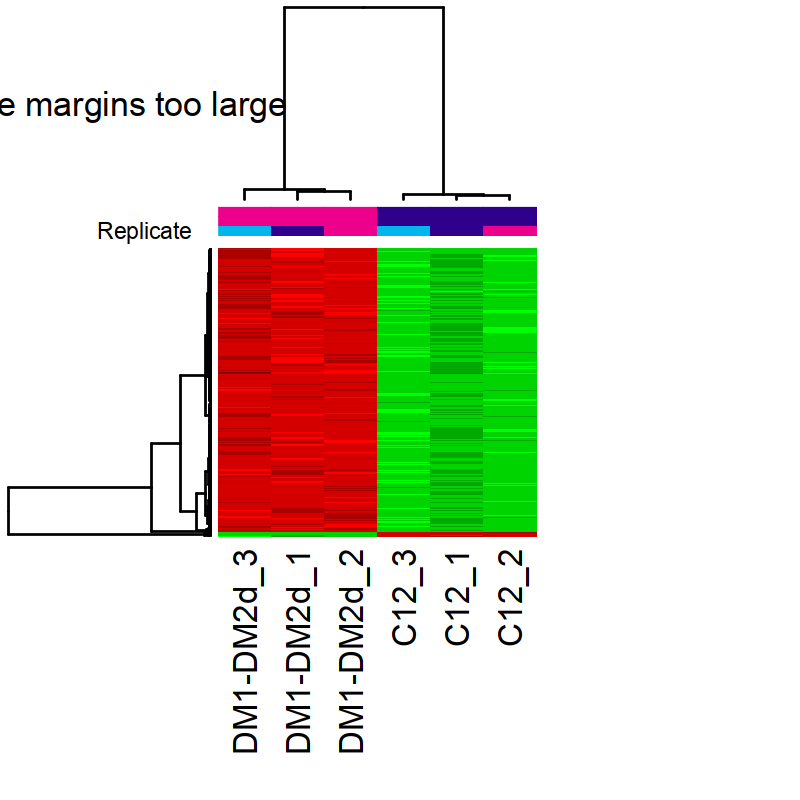

In [50]:
hmap <- colorRampPalette(c("red", "black", "green"))(n = 13)

readscores <- dba.plotHeatmap(dba, contrast=1, correlations=FALSE, 
                              scale="row", colScheme= hmap)

In [51]:
up_peaks <- list(
    'DM6-DM7' = peakAnno_tb_DM6_DM7 %>% filter(p.value < 0.05, Fold > 1) ,
    'DM1-DM2d' =peakAnno_tb_DM1_DM2d %>% filter(p.value < 0.05, Fold > 1) 
)
down_peaks <- list(
    'DM6-DM7' =peakAnno_tb_DM6_DM7 %>% filter(p.value < 0.05, Fold < -1) ,
    'DM1-DM2d' =peakAnno_tb_DM1_DM2d %>% filter(p.value < 0.05, Fold < -1) 
)
up_genes <- list (
    'DM6-DM7' =peakAnno_tb_DM6_DM7 %>% filter(p.value < 0.05, Fold > 1) %>% pull(geneId) %>% unique(),
    'DM1-DM2d' =peakAnno_tb_DM1_DM2d %>% filter(p.value < 0.05, Fold > 1) %>% pull(geneId) %>% unique()
    )
down_genes <- list (
    'DM6-DM7' =peakAnno_tb_DM6_DM7 %>% filter(p.value < 0.05, Fold < -1) %>% pull(geneId) %>% unique(),
    'DM1-DM2d' =peakAnno_tb_DM1_DM2d %>% filter(p.value < 0.05, Fold < -1) %>% pull(geneId) %>% unique()
)

In [52]:
up_peaks[[2]]

seqnames,start,end,width,strand,Conc,Conc_DM1.DM2d,Conc_Col.0_12DAS,Fold,p.value,FDR,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,distanceToTSS
<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
1,13367283,13368522,1240,*,10.867407,11.471913,9.807136,1.644114,4.599745e-146,4.798220e-143,Promoter (2-3kb),1,13362962,13365172,2211,2,AT1G35910,-2111
1,22833916,22834906,991,*,10.132763,10.798195,8.860314,1.890097,2.702760e-96,7.678804e-94,Promoter (<=1kb),1,22833811,22834062,252,2,AT1G08433,0
3,22216076,22216647,572,*,9.861569,10.425557,8.922723,1.477228,2.650325e-84,5.232594e-82,Promoter (<=1kb),3,22216540,22220824,4285,1,AT3G60140,0
4,8908671,8909165,495,*,10.001711,10.499283,9.236002,1.244102,6.022836e-77,9.251472e-75,Promoter (<=1kb),4,8908763,8910945,2183,1,AT4G15610,0
5,6044045,6044661,617,*,9.902236,10.443021,9.027189,1.392590,2.501546e-75,3.582695e-73,Promoter (1-2kb),5,6040919,6043014,2096,2,AT5G18270,-1031
1,21344814,21345638,825,*,10.270645,10.720302,9.613845,1.093734,4.445062e-75,6.314428e-73,Promoter (<=1kb),1,21345445,21346157,713,1,AT1G57630,0
3,3197110,3198157,1048,*,10.213745,10.722887,9.419878,1.282572,8.364307e-67,9.148510e-65,Promoter (<=1kb),3,3195314,3197457,2144,2,AT3G10320,0
5,25845438,25845931,494,*,9.503920,10.026471,8.676425,1.329133,5.363743e-63,5.213872e-61,Promoter (1-2kb),5,25841913,25843555,1643,2,AT5G64660,-1883
3,3964261,3964926,666,*,9.865478,10.446129,8.878333,1.528110,1.050945e-61,9.664685e-60,Promoter (<=1kb),3,3962136,3963984,1849,2,AT3G12500,-277


In [53]:
library(VennDiagram)

Loading required package: futile.logger



In [54]:

library(VennDiagram)
futile.logger::flog.threshold(futile.logger::ERROR, name = "VennDiagramLogger") ##suppress the log file 

NULL

In [55]:
fill_colors = c("DM6-DM7" = "#F8766D", 'DM1-DM2d' = '#BC7FB7'
                                 )

png 
  2

png 
  2

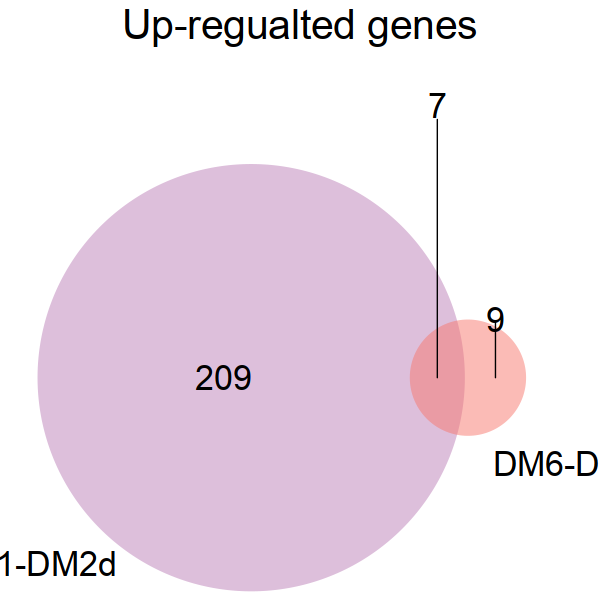

In [56]:
## https://wemp.app/posts/4444f152-32e0-4618-89a4-66a146945410
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 100)


venn_up_genes <- venn.diagram(up_genes, fill = c("#F8766D", '#BC7FB7'
                                        ),
                  alpha = c(0.5, 0.5), cat.cex = 2, ## Vector giving the size for each category name
                  cex=2,filename=NULL,  cat.dist = 0.07, # set name distanc to set
                  lty = 'blank', sub.fontfamily = "Helvetica",
                              cat.fontfamily = "Helvetica",
                    main = 'Up-regualted genes',
                        main.pos = c(0.5, 1.1), main.fontface = "plain",
                    main.fontfamily = "Helvetica", main.col = "black",
                    main.cex = 2.4, fontfamily = 'Helvetica',
                  ggplot = T) 


grid.newpage()
grid.draw(venn_up_genes)

pdf(file="./plots/venn_up_genes.pdf", width = 3, height = 3)
grid.newpage()
grid.draw(venn_up_genes)
dev.off()

pdf(file="./plots/venn_up_genes_small.pdf", width = 3, height = 2.5)
grid.newpage()
grid.draw(venn_up_genes)
dev.off()

png 
  2

png 
  2

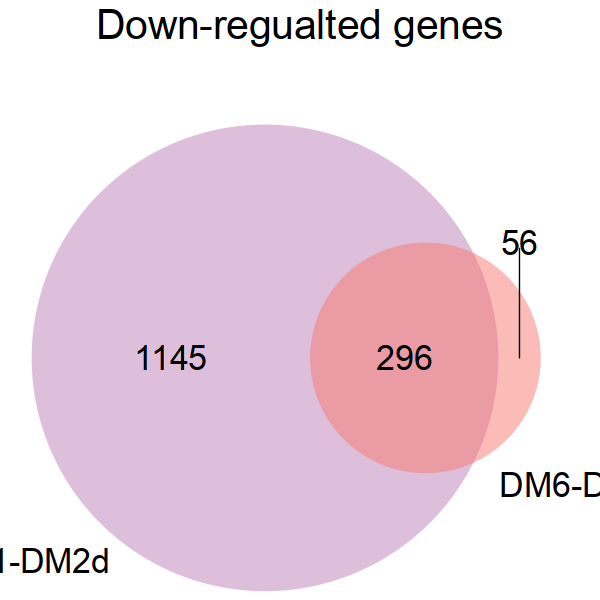

In [57]:
## https://wemp.app/posts/4444f152-32e0-4618-89a4-66a146945410
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 100)


venn_down_genes <- venn.diagram(down_genes, fill = c("#F8766D", '#BC7FB7'
                                        ),
                  alpha = c(0.5, 0.5), cat.cex = 2, ## Vector giving the size for each category name
                  cex=2,filename=NULL,  cat.dist = 0.07, # set name distanc to set
                  lty = 'blank', sub.fontfamily = "Helvetica",
                              cat.fontfamily = "Helvetica",
                    main = 'Down-regualted genes',
                        main.pos = c(0.5, 1.1), main.fontface = "plain",
                    main.fontfamily = "Helvetica", main.col = "black",
                    main.cex = 2.4, fontfamily = 'Helvetica',
                  ggplot = T)


grid.newpage()
grid.draw(venn_down_genes)

pdf(file="./plots/venn_down_genes.pdf", width = 3, height = 3)
grid.newpage()
grid.draw(venn_down_genes)
dev.off()
pdf(file="./plots/venn_down_genes_small.pdf", width = 3, height = 2.5)
grid.newpage()
grid.draw(venn_down_genes)
dev.off()

In [58]:
library("org.At.tair.db")
library("clusterProfiler")

In [59]:
go_enrichment_analysis <- function(peakAnno_tb) {
  # Ensure required libraries are loaded
  library(clusterProfiler)
  library(org.At.tair.db)
  
  # Filter for Fold > 1 and Fold < -1
  genes_upregulated <- subset(peakAnno_tb, Fold > 0.9)$geneId
  genes_downregulated <- subset(peakAnno_tb, Fold < -0.9)$geneId

  # Ensure the gene IDs are unique
  genes_upregulated <- unique(genes_upregulated)
  genes_downregulated <- unique(genes_downregulated)

  # GO enrichment analysis for upregulated genes
  ego_up <- enrichGO(gene         = genes_upregulated,
                     keyType      = 'TAIR',
                     OrgDb        = org.At.tair.db,  # Assuming Arabidopsis thaliana
                     ont          = "BP",            # Biological Process
                     pAdjustMethod = "BH",            # Benjamini & Hochberg
                     qvalueCutoff  = 0.05)

  # GO enrichment analysis for downregulated genes
  ego_down <- enrichGO(gene         = genes_downregulated,
                       keyType      = 'TAIR',
                       OrgDb        = org.At.tair.db,  # Assuming Arabidopsis thaliana
                       ont          = "BP",            # Biological Process
                       pAdjustMethod = "BH",            # Benjamini & Hochberg
                       qvalueCutoff  = 0.05)

  # Return the results as a list containing both upregulated and downregulated results
  return(list(upregulated = ego_up, downregulated = ego_down))
}

# To use the function and view results:
results_DM1_DM2d <- go_enrichment_analysis(peakAnno_tb_DM1_DM2d)
results_DM6_DM7 <- go_enrichment_analysis(peakAnno_tb_DM6_DM7)
summary(results_DM1_DM2d$upregulated)
summary(results_DM1_DM2d$downregulated)


Warning message in summary(results_DM1_DM2d$upregulated):
“summary method to convert the object to data.frame is deprecated, please use as.data.frame instead.”


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0036293,GO:0036293,response to decreased oxygen levels,23/262,352/25790,1.944566e-12,7.617195e-10,6.358060e-10,AT4G15610/AT1G57630/AT2G18690/AT5G06320/AT5G02420/AT1G67980/AT5G26920/AT5G45340/AT5G15120/AT1G53620/AT3G14205/AT1G26380/AT1G13300/AT1G53625/AT1G26410/AT2G35730/AT1G14550/AT4G18990/AT1G02360/AT1G19250/AT1G77145/AT1G77640/AT1G10140,23
GO:0070482,GO:0070482,response to oxygen levels,23/262,353/25790,2.061487e-12,7.617195e-10,6.358060e-10,AT4G15610/AT1G57630/AT2G18690/AT5G06320/AT5G02420/AT1G67980/AT5G26920/AT5G45340/AT5G15120/AT1G53620/AT3G14205/AT1G26380/AT1G13300/AT1G53625/AT1G26410/AT2G35730/AT1G14550/AT4G18990/AT1G02360/AT1G19250/AT1G77145/AT1G77640/AT1G10140,23
GO:0001666,GO:0001666,response to hypoxia,21/262,342/25790,5.893788e-11,1.451836e-08,1.211845e-08,AT4G15610/AT1G57630/AT2G18690/AT5G06320/AT1G67980/AT5G26920/AT5G45340/AT5G15120/AT1G53620/AT3G14205/AT1G26380/AT1G13300/AT1G53625/AT1G26410/AT2G35730/AT1G14550/AT4G18990/AT1G02360/AT1G19250/AT1G77145/AT1G10140,21
GO:0009627,GO:0009627,systemic acquired resistance,13/262,135/25790,1.327202e-09,2.452005e-07,2.046685e-07,AT4G15610/AT2G18690/AT2G43570/AT1G74710/AT1G67980/AT3G01420/AT5G26920/AT5G13320/AT2G14610/AT3G13950/AT1G73805/AT1G19250/AT4G11070,13
GO:0044550,GO:0044550,secondary metabolite biosynthetic process,18/262,393/25790,1.311700e-07,1.938692e-05,1.618223e-05,AT4G28940/AT2G42350/AT4G17785/AT1G67980/AT3G13950/AT1G22480/AT3G13610/AT5G43570/AT5G62140/AT4G27260/AT1G51840/AT1G80820/AT3G17420/AT3G44540/AT4G30670/AT1G61820/AT1G66230/AT4G13660,18
GO:0071456,GO:0071456,cellular response to hypoxia,13/262,241/25790,1.250732e-06,1.267016e-04,1.057576e-04,AT1G57630/AT5G06320/AT5G26920/AT5G45340/AT5G15120/AT1G53620/AT1G26380/AT1G13300/AT1G26410/AT1G14550/AT1G02360/AT1G19250/AT1G10140,13
GO:0036294,GO:0036294,cellular response to decreased oxygen levels,13/262,243/25790,1.371600e-06,1.267016e-04,1.057576e-04,AT1G57630/AT5G06320/AT5G26920/AT5G45340/AT5G15120/AT1G53620/AT1G26380/AT1G13300/AT1G26410/AT1G14550/AT1G02360/AT1G19250/AT1G10140,13
GO:0071453,GO:0071453,cellular response to oxygen levels,13/262,243/25790,1.371600e-06,1.267016e-04,1.057576e-04,AT1G57630/AT5G06320/AT5G26920/AT5G45340/AT5G15120/AT1G53620/AT1G26380/AT1G13300/AT1G26410/AT1G14550/AT1G02360/AT1G19250/AT1G10140,13
GO:0090693,GO:0090693,plant organ senescence,15/262,372/25790,7.021924e-06,5.765780e-04,4.812687e-04,AT4G15610/AT5G18270/AT2G18690/AT4G28940/AT2G43570/AT3G13500/AT5G44610/AT2G45760/AT4G18425/AT1G26930/AT3G14205/AT2G35730/AT4G30790/AT2G23450/AT1G18860,15


Warning message in summary(results_DM1_DM2d$downregulated):
“summary method to convert the object to data.frame is deprecated, please use as.data.frame instead.”


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0009639,GO:0009639,response to red or far red light,86/1553,434/25790,5.877913e-23,9.757336e-20,7.901153e-20,AT4G38860/AT5G60840/AT1G67900/AT3G59060/AT3G58850/AT3G62650/AT1G14920/AT3G61750/AT5G66580/AT1G32900/AT2G43010/AT4G00050/AT5G28490/AT1G02350/AT2G29090/AT5G15160/AT2G45080/AT1G15550/AT2G46590/AT5G67190/AT2G05070/AT2G44940/AT5G18670/AT1G21050/AT3G62090/AT2G42870/AT5G20170/AT4G16780/AT5G13630/AT4G16490/AT4G27657/AT2G25080/AT2G31380/AT4G36930/AT1G79060/AT1G75590/AT3G22840/AT4G27310/AT1G18400/AT1G73870/AT1G22770/AT1G09530/AT3G05936/AT1G01520/AT5G20190/AT5G61270/AT1G69160/AT3G28910/AT4G39070/AT1G68500/AT5G39860/AT5G67390/AT1G76500/AT4G32980/AT1G52565/AT1G12710/AT3G14870/AT2G19650/AT5G52250/AT1G20900/AT1G01500/AT4G37580/AT2G33360/AT4G14130/AT1G75180/AT5G41780/AT5G51810/AT1G72500/AT3G28860/AT2G46735/AT2G02950/AT4G36110/AT4G14690/AT1G80340/AT1G06980/AT1G18660/AT5G35970/AT3G55370/AT2G20180/AT1G52410/AT4G36105/AT2G46420/AT2G45630/AT4G15430/AT5G48150/AT4G36880,86
GO:0042546,GO:0042546,cell wall biogenesis,84/1553,495/25790,5.061502e-18,4.201046e-15,3.401862e-15,AT5G44260/AT4G03210/AT4G39350/AT1G14720/AT3G13690/AT3G61910/AT3G61750/AT1G69030/AT5G14210/AT1G02350/AT4G24000/AT1G17940/AT2G36870/AT1G01570/AT4G20170/AT2G06850/AT5G13100/AT3G25700/AT5G52280/AT2G44940/AT3G17120/AT2G44930/AT3G11700/AT3G23810/AT5G49100/AT5G63410/AT4G21903/AT4G12730/AT5G65730/AT5G64740/AT1G03870/AT4G32410/AT4G37800/AT5G44130/AT2G01850/AT5G65650/AT2G22125/AT4G17890/AT4G22130/AT5G57700/AT1G01050/AT5G65810/AT3G06770/AT5G41130/AT5G15220/AT1G12380/AT2G35700/AT5G41140/AT2G35620/AT5G19060/AT1G75500/AT2G22795/AT4G38950/AT4G11150/AT1G78580/AT1G45130/AT4G14130/AT5G67210/AT5G47820/AT4G36160/AT1G72416/AT4G23990/AT5G16600/AT5G09870/AT4G02100/AT2G26730/AT2G18060/AT1G52290/AT5G14360/AT3G19820/AT4G17880/AT1G77460/AT3G53190/AT3G52370/AT1G10550/AT2G46770/AT1G72160/AT4G27270/AT1G41830/AT1G60270/AT5G01200/AT4G19120/AT2G32540/AT5G61290,84
GO:0009733,GO:0009733,response to auxin,74/1553,443/25790,1.194791e-15,6.611177e-13,5.353503e-13,AT5G43700/AT4G38840/AT4G38860/AT5G60840/AT2G21210/AT4G34760/AT1G67900/AT3G59060/AT1G19840/AT5G66580/AT5G37020/AT1G75580/AT2G33860/AT5G56860/AT3G23050/AT2G43010/AT5G17300/AT1G04240/AT5G64770/AT1G02350/AT2G22240/AT4G12980/AT2G06850/AT1G31710/AT3G62980/AT4G16780/AT5G63160/AT1G30330/AT4G37540/AT1G75590/AT3G01490/AT1G12820/AT3G07010/AT5G12330/AT2G28350/AT3G46110/AT3G01130/AT5G43870/AT1G53230/AT1G76610/AT1G69160/AT3G28910/AT3G25717/AT5G52900/AT4G25433/AT2G22670/AT5G41900/AT5G13300/AT1G75500/AT4G34770/AT5G09810/AT4G37610/AT5G02580/AT1G52565/AT1G77690/AT4G37580/AT5G12050/AT3G23030/AT4G18710/AT1G19850/AT3G28860/AT4G38630/AT4G33770/AT4G36110/AT5G54510/AT4G21740/AT1G56650/AT5G64260/AT5G66700/AT2G01950/AT2G33310/AT3G26810/AT5G65670/AT3G55120,74
GO:0010016,GO:0010016,shoot system morphogenesis,54/1553,275/25790,1.002794e-14,4.161594e-12,3.369915e-12,AT5G51550/AT3G13690/AT5G03680/AT4G12970/AT1G01030/AT2G34710/AT3G63440/AT5G10310/AT3G28040/AT2G30010/AT5G52280/AT5G67420/AT1G33170/AT4G16780/AT1G27370/AT5G53400/AT1G80490/AT4G36870/AT1G73870/AT3G15030/AT2G37630/AT3G61460/AT1G62500/AT1G68130/AT5G19730/AT1G25250/AT1G04150/AT2G29970/AT4G14723/AT1G53230/AT5G65810/AT2G01940/AT1G68480/AT2G26330/AT2G41820/AT1G12380/AT5G13300/AT3G14240/AT2G40475/AT1G69780/AT4G18710/AT3G50660/AT3G61970/AT2G23760/AT4G01500/AT5G53210/AT1G36160/AT1G34245/AT5G60970/AT2G42200/AT4G37810/AT5G08520/AT5G62710/AT3G24770,54
GO:0009606,GO:0009606,tropism,39/1553,175/25790,8.042098e-13,2.669977e-10,2.162055e-10,AT3G45780/AT1G14280/AT3G48550/AT3G23050/AT2G43010/AT4G00050/AT5G64770/AT5G19190/AT1G30360/AT1G66940/AT1G21050/AT1G68130/AT1G25250/AT2G30520/AT1G76610/AT2G01940/AT5G64330/AT5G67440/AT2G40475/AT5G01740/AT3G14870/AT4G26610/AT3G27580/AT1G75180/AT2G21300/AT2G22680/AT3G28860/AT3G54220/AT2G02950/AT2G27770/AT3G56050/AT2G20180/AT4G37590/AT5G55910/AT5G11420/AT3G06130/AT3G44610/AT2G20240/A

In [60]:
create_and_save_dotplot <- function(ego_data, direction = "up", 
                                    showCategory = 5, 
                                    title = NULL) {
  
  # Set default titles if not provided
  if (is.null(title)) {
    if (direction == "up") {
      title <- "GO Enrichment for Upregulated Genes"
    } else {
      title <- "GO Enrichment for Downregulated Genes"
    }
  }
  
  # Create dotplot
plot <- dotplot(ego_data, showCategory = showCategory) + 
    # theme_minimal() + 
    ggplot2::theme_minimal() +
    ggtitle(title) +  theme_Arial_8() +
    theme(plot.title = element_text(hjust = 0.5, size=8),
          axis.title.x = element_text(size=8),
          axis.title.y = element_text(size=8),
          axis.text.x = element_text(size=8),
          axis.text.y = element_text(size=8),
         legend.position = "bottom",
          # legend.position = c(0.4, 0.2),
         # legend.key.size = unit(0.1, "cm") ##size of each key
         ) +
        scale_y_discrete(labels = wrap_format(24)) +
        scale_size(range = c(1, 3)) #dot size scale
   
  
  # # Save plot to a file
  # if (direction == "up") {
  #   ggsave(file.path(diffbind_result_dir, "GO_enrichment_upregulated_genes.png"), plot = plot, width = 7, height = 4)
  # } else {
  #   ggsave(file.path(diffbind_result_dir, "GO_enrichment_downregulated_genes.png"), plot = plot, width = 7, height = 4)
  # }
  return(plot)
}

# Example usage:
# For upregulated genes
upregulated_plot_DM1_DM2d <- create_and_save_dotplot(results_DM1_DM2d$upregulated, direction = "up")
upregulated_plot_DM6_DM7 <- create_and_save_dotplot(results_DM6_DM7$upregulated, direction = "up")
# For downregulated genes
downregulated_plot_DM1_DM2d <- create_and_save_dotplot(results_DM1_DM2d$downregulated, direction = "down")
downregulated_plot_DM6_DM7 <- create_and_save_dotplot(results_DM6_DM7$downregulated, direction = "down")

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


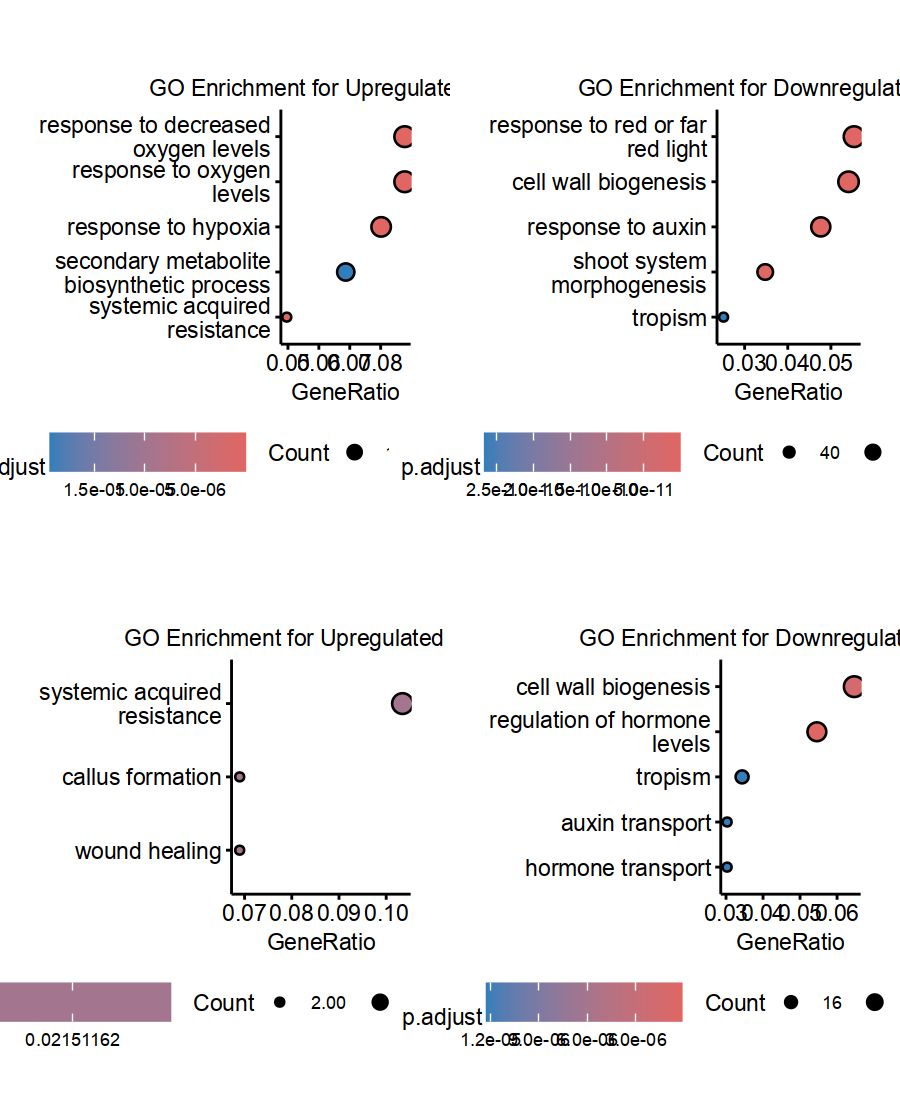

In [61]:
width_ = 4.5
height_ = 5.5
options(repr.plot.width= width_ , repr.plot.height= height_ , repr.plot.res = 200)

library(gridExtra)
# Arrange the plots
# GO_plot <- grid.arrange(upregulated_plot_DM1_DM2d, upregulated_plot_DM6_DM7,
#              downregulated_plot_DM1_DM2d, downregulated_plot_DM6_DM7,
#              ncol=2)

GO_plot <- grid.arrange(upregulated_plot_DM1_DM2d, downregulated_plot_DM1_DM2d, upregulated_plot_DM6_DM7,
             downregulated_plot_DM6_DM7,
             ncol=2)


GO_plot %>% ggsave(file.path(diffbind_result_dir, "GO_enrichment.pdf"), plot = ., width = width_, height = height_)

In [62]:
connectivity_table_info <- readRDS('/media/HDD2/donghui/Pathogen_JC14_3DM/WGCNA_output_all/RDS/connectivity_info.rds')

In [63]:
peakAnno_tb_DM1_DM2d %>% pull(geneId) %>% unique %>% length

[1] 18919

In [64]:
peakAnno_tb_DM1_DM2d %>% names

[1] "seqnames"         "start"            "end"              "width"           
 [5] "strand"           "Conc"             "Conc_DM1.DM2d"    "Conc_Col.0_12DAS"
 [9] "Fold"             "p.value"          "FDR"              "annotation"      
[13] "geneChr"          "geneStart"        "geneEnd"          "geneLength"      
[17] "geneStrand"       "geneId"           "distanceToTSS"

In [65]:
peakAnno_tb_DM1_DM2d

seqnames,start,end,width,strand,Conc,Conc_DM1.DM2d,Conc_Col.0_12DAS,Fold,p.value,FDR,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,distanceToTSS
<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
4,1499634,1501162,1529,*,11.92187,10.763482,12.55599,-1.781170,0.000000e+00,0.000000e+00,Promoter (<=1kb),4,1501168,1503699,2532,1,AT4G03410,-6
5,17549546,17550412,867,*,10.98308,9.719106,11.64629,-1.911195,3.032725e-296,1.059801e-291,Promoter (<=1kb),5,17550179,17551715,1537,1,AT5G43700,0
1,28051844,28052977,1134,*,10.95742,9.634458,11.63574,-1.986292,2.505017e-280,5.835938e-276,Promoter (<=1kb),1,28053030,28054149,1120,1,AT1G74670,-53
5,5236541,5237157,617,*,10.90743,9.407313,11.62681,-2.200833,6.458652e-278,1.128504e-273,Promoter (<=1kb),5,5236634,5236879,246,1,AT5G02495,0
4,18125528,18126153,626,*,10.84013,9.152175,11.59684,-2.421741,5.339122e-273,7.463131e-269,Promoter (<=1kb),4,18124978,18125559,582,2,AT4G38840,0
2,17508762,17510805,2044,*,12.02425,10.986657,12.62153,-1.624678,3.101728e-272,3.613047e-268,Promoter (1-2kb),2,17507343,17508616,1274,1,AT2G41940,1419
4,18129382,18129895,514,*,10.06330,8.603692,10.77384,-2.151382,3.550806e-271,3.545277e-267,Promoter (<=1kb),4,18130237,18131284,1048,1,AT4G38860,-342
3,7104355,7104488,134,*,10.25217,8.418776,11.03407,-2.588420,1.021448e-256,8.923750e-253,Promoter (<=1kb),3,7103817,7104250,434,1,AT3G20362,538
3,16814436,16815495,1060,*,11.18479,9.906645,11.85171,-1.929069,3.088952e-251,2.398777e-247,Promoter (1-2kb),3,16816721,16824210,7490,1,AT3G45780,-1226


In [66]:
peakAnno_tb_DM1_DM2d %>% select(geneId, 'seqnames', 'start', 'end', 'width', 'strand', 'Fold', 'p.value', 'annotation') %>% filter(p.value < 0.05)

geneId,seqnames,start,end,width,strand,Fold,p.value,annotation
<chr>,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<chr>
AT4G03410,4,1499634,1501162,1529,*,-1.781170,0.000000e+00,Promoter (<=1kb)
AT5G43700,5,17549546,17550412,867,*,-1.911195,3.032725e-296,Promoter (<=1kb)
AT1G74670,1,28051844,28052977,1134,*,-1.986292,2.505017e-280,Promoter (<=1kb)
AT5G02495,5,5236541,5237157,617,*,-2.200833,6.458652e-278,Promoter (<=1kb)
AT4G38840,4,18125528,18126153,626,*,-2.421741,5.339122e-273,Promoter (<=1kb)
AT2G41940,2,17508762,17510805,2044,*,-1.624678,3.101728e-272,Promoter (1-2kb)
AT4G38860,4,18129382,18129895,514,*,-2.151382,3.550806e-271,Promoter (<=1kb)
AT3G20362,3,7104355,7104488,134,*,-2.588420,1.021448e-256,Promoter (<=1kb)
AT3G45780,3,16814436,16815495,1060,*,-1.929069,3.088952e-251,Promoter (1-2kb)


In [67]:
peakAnno_tb_DM1_DM2d %>% select( 'seqnames', 'start', 'end', 'width') %>% distinct

seqnames,start,end,width
<fct>,<int>,<int>,<int>
4,1499634,1501162,1529
5,17549546,17550412,867
1,28051844,28052977,1134
5,5236541,5237157,617
4,18125528,18126153,626
2,17508762,17510805,2044
4,18129382,18129895,514
3,7104355,7104488,134
3,16814436,16815495,1060


In [68]:
peakAnno_tb_DM1_DM2d %>% select(seqnames, 'start', 'end', 'width') %>% saveRDS(file = './fimo/peakAnno_tb_DM1_DM2d.rds')

In [69]:
peakAnno_tb_DM6_DM7 %>% select(geneId, 'seqnames', 'start', 'end', 'width', 'strand', 'Fold', 'p.value', 'annotation')

geneId,seqnames,start,end,width,strand,Fold,p.value,annotation
<chr>,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<chr>
AT5G44260,5,17828736,17829549,814,*,-1.8636218,1.141954e-201,Promoter (1-2kb)
AT1G68872,1,25890005,25890885,881,*,-1.8412990,3.043521e-188,Promoter (<=1kb)
AT1G12090,1,4092311,4092827,517,*,-2.0944668,1.357355e-143,Promoter (1-2kb)
AT4G26530,4,13390549,13391483,935,*,-1.4529198,9.049185e-140,Promoter (<=1kb)
AT4G38860,4,18129382,18129895,514,*,-1.4777337,2.542216e-134,Promoter (<=1kb)
AT5G52060,5,21150450,21151029,580,*,-1.6545169,5.181464e-134,Distal Intergenic
AT4G01460,4,619442,620199,758,*,-1.3391603,6.193636e-125,Promoter (<=1kb)
AT4G16740,4,9406538,9408015,1478,*,-1.5285863,8.426412e-120,Promoter (<=1kb)
AT4G05870,4,6877530,6878186,657,*,-1.4454148,9.949632e-115,Promoter (<=1kb)


In [70]:
Res_2DM <- readRDS('../3DM_shoot/Rds_Rdata/Res_3DM.2023-04-21 14:05:06rds') %>% filter(
        contrast %in% c('DM1/DM2d_vs_Col-0_12', 'DM6/DM7_vs_Col-0_14')) %>% select(AGI, log2FoldChange, line) 
Res_2DM <- Res_2DM %>% tidyr::pivot_wider(names_from = line, values_from = log2FoldChange) %>% dplyr::rename(DM6_DM7_RNA = `DM6/DM7`, DM1_DM2d_RNA = `DM1/DM2d`)

In [71]:
DM1_DM2d_RNA_ATAC <- peakAnno_tb_DM1_DM2d %>% select(geneId,  'seqnames', 'start', 'end', Fold) %>%  dplyr::rename(ATAC_DM1_DM2d = Fold) %>%
    inner_join( peakAnno_tb_DM6_DM7 %>% select( geneId, 'seqnames', 'start', 'end', Fold) %>%  dplyr::rename(ATAC_DM6_DM7 = Fold), by = c('geneId', 'seqnames', 'start', 'end'))  %>% 
  dplyr::select(geneId, ATAC_DM1_DM2d, ATAC_DM6_DM7) %>%
    left_join(Res_2DM, by = c('geneId' = 'AGI')) %>% filter(!is.na(DM6_DM7_RNA), !is.na(DM1_DM2d_RNA))

In [72]:
DM1_DM2d_RNA_ATAC

geneId,ATAC_DM1_DM2d,ATAC_DM6_DM7,DM6_DM7_RNA,DM1_DM2d_RNA
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
AT4G03410,-1.781170,-0.9798778,0.5832125,0.9243191
AT5G43700,-1.911195,-1.0206563,-1.3922101,-4.1769776
AT1G74670,-1.986292,-1.0961704,-0.9786896,-3.2555952
AT4G38840,-2.421741,-1.1197465,-1.3918752,-6.0770641
AT2G41940,-1.624678,-0.9588518,0.1375385,-3.5119750
AT4G38860,-2.151382,-1.4777337,-2.4698979,-6.6034972
AT3G20362,-2.588420,-1.0467955,0.0000000,-3.3780991
AT3G45780,-1.929069,-0.7259973,-0.3797616,-3.7940194
AT5G44260,-1.997740,-1.8636218,-1.0978623,-3.3656220


In [73]:
DM1_DM2d_RNA_ATAC_cat <- DM1_DM2d_RNA_ATAC %>% mutate(DM1_DM2d_RNA_cat = case_when( 
    DM1_DM2d_RNA >= 2 ~ '2',
    DM1_DM2d_RNA > 1 & DM1_DM2d_RNA < 2 ~ '1',
    DM1_DM2d_RNA < 1 & DM1_DM2d_RNA > -1 ~ '0',
    DM1_DM2d_RNA < -1  & DM1_DM2d_RNA > -2 ~ '-1',
    DM1_DM2d_RNA <= -2 ~ '-2'),
    
    DM6_DM7_RNA_cat = case_when(
        DM6_DM7_RNA >= 2 ~ '2',
        DM6_DM7_RNA > 1 & DM6_DM7_RNA < 2 ~ '1',
        DM6_DM7_RNA < 1 & DM6_DM7_RNA > -1 ~ '0',
        DM6_DM7_RNA < -1  & DM6_DM7_RNA > -2 ~ '-1',
        DM6_DM7_RNA <= -2 ~ '-2'),
    
    DM1_DM2d_ATAC_cat = case_when(
        ATAC_DM1_DM2d >= 1 ~ '1',
        ATAC_DM1_DM2d > 0 & ATAC_DM1_DM2d < 1 ~ '0.001',
        ATAC_DM1_DM2d < 0 & ATAC_DM1_DM2d > -1 ~ '-0.001',
        ATAC_DM1_DM2d < -1 ~ '-1'),
    
    DM6_DM7_ATAC_cat = case_when(
        ATAC_DM6_DM7 >= 1 ~ '1',
        ATAC_DM6_DM7 > 0 & ATAC_DM6_DM7 < 1 ~ '0.001',
        ATAC_DM6_DM7 < 0  & ATAC_DM6_DM7 > -1 ~ '-0.001',
        ATAC_DM6_DM7 < -1 ~ '-1')
                             
    ) %>% select(geneId, DM1_DM2d_RNA_cat, DM6_DM7_RNA_cat, DM1_DM2d_ATAC_cat, DM6_DM7_ATAC_cat)

In [74]:
DM1_DM2d_RNA_ATAC_cat <- DM1_DM2d_RNA_ATAC %>% mutate(DM1_DM2d_RNA_cat = case_when( 
    DM1_DM2d_RNA >= 2 ~ '2',
    DM1_DM2d_RNA > 1 & DM1_DM2d_RNA < 2 ~ '1',
    DM1_DM2d_RNA < 1 & DM1_DM2d_RNA > -1 ~ '0',
    DM1_DM2d_RNA < -1  & DM1_DM2d_RNA > -2 ~ '-1',
    DM1_DM2d_RNA <= -2 ~ '-2'),
    
    DM6_DM7_RNA_cat = case_when(
        DM6_DM7_RNA >= 2 ~ '2',
        DM6_DM7_RNA > 1 & DM6_DM7_RNA < 2 ~ '1',
        DM6_DM7_RNA < 1 & DM6_DM7_RNA > -1 ~ '0',
        DM6_DM7_RNA < -1  & DM6_DM7_RNA > -2 ~ '-1',
        DM6_DM7_RNA <= -2 ~ '-2'),
    
    DM1_DM2d_ATAC_cat = case_when(
        ATAC_DM1_DM2d >= 1 ~ '1',
        ATAC_DM1_DM2d > 0 & ATAC_DM1_DM2d < 1 ~ '0.001',
        ATAC_DM1_DM2d < 0 & ATAC_DM1_DM2d > -1 ~ '-0.001',
        ATAC_DM1_DM2d < -1 ~ '-1'),
    
    DM6_DM7_ATAC_cat = case_when(
        ATAC_DM6_DM7 >= 1 ~ '1',
        ATAC_DM6_DM7 > 0 & ATAC_DM6_DM7 < 1 ~ '0.001',
        ATAC_DM6_DM7 < 0  & ATAC_DM6_DM7 > -1 ~ '-0.001',
        ATAC_DM6_DM7 < -1 ~ '-1')
                             
    ) %>% select(geneId, DM1_DM2d_RNA_cat, DM6_DM7_RNA_cat, DM1_DM2d_ATAC_cat, DM6_DM7_ATAC_cat)

In [75]:
DM1_DM2d_RNA_ATAC_cat

geneId,DM1_DM2d_RNA_cat,DM6_DM7_RNA_cat,DM1_DM2d_ATAC_cat,DM6_DM7_ATAC_cat
<chr>,<chr>,<chr>,<chr>,<chr>
AT4G03410,0,0,-1,-0.001
AT5G43700,-2,-1,-1,-1
AT1G74670,-2,0,-1,-1
AT4G38840,-2,-1,-1,-1
AT2G41940,-2,0,-1,-0.001
AT4G38860,-2,-2,-1,-1
AT3G20362,-2,0,-1,-1
AT3G45780,-2,0,-1,-0.001
AT5G44260,-2,-1,-1,-1


In [76]:
DM1_DM2d_RNA_ATAC_sum <- DM1_DM2d_RNA_ATAC_cat %>% group_by(DM1_DM2d_RNA_cat, DM6_DM7_RNA_cat, DM1_DM2d_ATAC_cat, DM6_DM7_ATAC_cat) %>% summarise(n = n()) %>% ungroup()
DM1_DM2d_RNA_ATAC_sum 

`summarise()` has grouped output by 'DM1_DM2d_RNA_cat', 'DM6_DM7_RNA_cat',
'DM1_DM2d_ATAC_cat'. You can override using the `.groups` argument.


DM1_DM2d_RNA_cat,DM6_DM7_RNA_cat,DM1_DM2d_ATAC_cat,DM6_DM7_ATAC_cat,n
<chr>,<chr>,<chr>,<chr>,<int>
-1,-1,-0.001,-0.001,356
-1,-1,-0.001,-1,4
-1,-1,-0.001,0.001,6
-1,-1,-1,-0.001,43
-1,-1,-1,-1,9
-1,-1,0.001,-0.001,1
-1,-1,0.001,0.001,135
-1,-1,1,0.001,1
-1,-2,-0.001,-0.001,120


In [77]:
library(ggalluvial)

Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


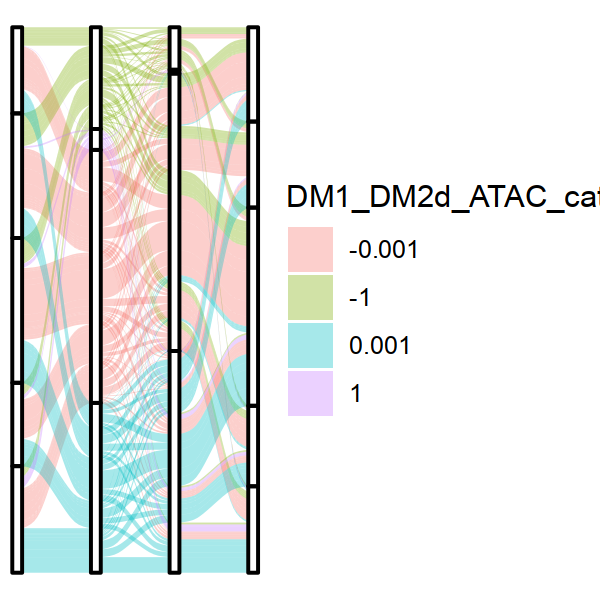

In [78]:
width_ = 3
height_ = 3
options(repr.plot.width= width_ , repr.plot.height= height_ , repr.plot.res = 200)

DM1_DM2d_RNA_ATAC_sum %>% 
    ggplot( aes(axis1 = DM1_DM2d_RNA_cat, axis2 = DM1_DM2d_ATAC_cat, axis3 = DM6_DM7_ATAC_cat,
                axis4 = DM6_DM7_RNA_cat, y = n)) +
  geom_flow(aes(fill = DM1_DM2d_ATAC_cat), alpha = 0.35, stat = "alluvium", width = 1/8)+
    geom_stratum(alpha = 0.01, width = 1/8)+  
    # geom_text(stat = "stratum", aes(label = after_stat(stratum))) +
  # ggtitle("Your Dataset Title Here") + 
  theme_Arial_8() +
  theme_void() +
  scale_y_continuous(trans = 'sqrt') +# Apply square root transformation
  theme(
    axis.title.y = element_blank(), # Remove y-axis title
    axis.text.y = element_blank()   # Remove y-axis text
  )

In [79]:
DM1_DM2d_RNA_ATAC_sum %>% 
    ggplot( aes(axis1 = DM1_DM2d_RNA_cat, axis2 = DM1_DM2d_ATAC_cat, axis3 = DM6_DM7_ATAC_cat,
                axis4 = DM6_DM7_RNA_cat, y = n)) +
  geom_flow(aes(fill = DM1_DM2d_ATAC_cat), alpha = 0.35, stat = "alluvium", width = 1/8) +
    geom_alluvium(aes(fill = module),  alpha = .4,
                width = 1/8, knot.pos = 0, reverse = FALSE, curve_type = "cubic") +
  scale_fill_manual(values = module_colors) +
  guides(fill = "none") +
  geom_stratum(alpha = 0.01, width = 1/8, reverse = FALSE) +
  geom_text(stat = "stratum", aes(label = after_stat(stratum)),
            reverse = FALSE) +
  # ggtitle("Your Dataset Title Here") + 
  theme_Arial_8() +
  theme_void() +
  scale_y_continuous(trans = 'sqrt') +# Apply square root transformation
  theme(
    axis.title.y = element_blank(), # Remove y-axis title
    axis.text.y = element_blank()   # Remove y-axis text
  )

ERROR: Error in eval(expr, envir, enclos): object 'module_colors' not found


In [80]:
DM1_DM2d_RNA_ATAC_cat <- DM1_DM2d_RNA_ATAC_cat  %>% distinct

In [81]:
# Convert data frames to GRanges objects
gr1 <- makeGRangesFromDataFrame(peakAnno_tb_DM1_DM2d, keep.extra.columns = TRUE)
gr2 <- makeGRangesFromDataFrame(peakAnno_tb_DM6_DM7, keep.extra.columns = TRUE)

# Expand the ranges by 10bp on each side
gr1_expanded <- resize(gr1, width = width(gr1) + 20, fix = "center")
gr2_expanded <- resize(gr2, width = width(gr2) + 20, fix = "center")

# Find overlaps
overlaps <- findOverlaps(gr1_expanded, gr2_expanded)

# If you want to get the intersection of the overlaps:
intersected_ranges <- pintersect(gr1[queryHits(overlaps)], gr2[subjectHits(overlaps)])

# Convert back to a data.frame (if needed)
overlapping_peaks <- data.frame(
  seqnames = seqnames(intersected_ranges),
  start = start(intersected_ranges),
  end = end(intersected_ranges)
)

# Print the result
overlapping_peaks

seqnames,start,end
<fct>,<int>,<int>
4,1499634,1501162
5,17549546,17550412
1,28051844,28052977
5,5236541,5237157
4,18125528,18126153
2,17508762,17510805
4,18129382,18129895
3,7104355,7104488
3,16814436,16815495


## Venn

In [82]:
peakAnno_tb_DM1_DM2d%>% filter(p.value < 0.05) %>% filter(Fold >0 ) %>% dplyr::select(geneId) %>% distinct %>% pull(geneId) %>% length
peakAnno_tb_DM1_DM2d%>% filter(p.value < 0.05) %>% filter(Fold <0 ) %>% dplyr::select(geneId) %>% distinct %>% pull(geneId) %>% length

[1] 7520

[1] 13510

In [83]:
peakAnno_tb_DM6_DM7 %>% filter(p.value < 0.05) %>% filter(Fold >0 ) %>% dplyr::select(geneId) %>% distinct %>% pull(geneId) %>% length
peakAnno_tb_DM6_DM7 %>% filter(p.value < 0.05) %>% filter(Fold <0 ) %>% dplyr::select(geneId) %>% distinct %>% pull(geneId) %>% length

[1] 13198

[1] 11301

In [84]:
Res_2DM %>% filter(DM6_DM7_RNA > 1) %>% pull(AGI) %>% length
Res_2DM %>% filter(DM6_DM7_RNA < -1) %>% pull(AGI) %>% length

Res_2DM %>% filter(DM1_DM2d_RNA > 1) %>% pull(AGI) %>% length
Res_2DM %>% filter(DM1_DM2d_RNA < -1) %>% pull(AGI) %>% length

[1] 4835

[1] 6072

[1] 7592

[1] 7819

In [85]:
ups_genes <- list (
    'DM6-DM7_ATAC' = peakAnno_tb_DM6_DM7 %>% filter(p.value < 0.05) %>% filter(Fold >0 ) %>% dplyr::select(geneId) %>% distinct %>% pull(geneId),
    'DM1-DM2d_ATAC' = peakAnno_tb_DM1_DM2d %>% filter(p.value < 0.05) %>% filter(Fold >0 ) %>% dplyr::select(geneId) %>% distinct %>% pull(geneId),
    'DM6-DM7_RNA' = Res_2DM %>% filter(DM6_DM7_RNA > 1) %>% pull(AGI),
    'DM1-DM2d_RNA' = Res_2DM %>% filter(DM1_DM2d_RNA > 1) %>% pull(AGI)
    )

down_genes <- list (
    'DM6-DM7_ATAC' = peakAnno_tb_DM6_DM7 %>% filter(p.value < 0.05) %>% filter(Fold <0 ) %>% dplyr::select(geneId) %>% distinct %>% pull(geneId),
    'DM1-DM2d_ATAC' = peakAnno_tb_DM1_DM2d %>% filter(p.value < 0.05) %>% filter(Fold <0 ) %>% dplyr::select(geneId) %>% distinct %>% pull(geneId),
    'DM6-DM7_RNA' = Res_2DM %>% filter(DM6_DM7_RNA < -1) %>% pull(AGI),
    'DM1-DM2d_RNA' = Res_2DM %>% filter(DM1_DM2d_RNA < -1) %>% pull(AGI)
)

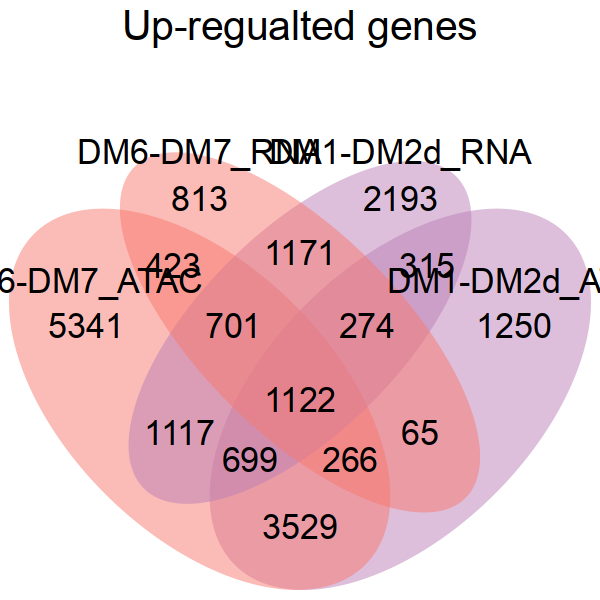

In [86]:
## https://wemp.app/posts/4444f152-32e0-4618-89a4-66a146945410
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 100)


venn_up_genes <- venn.diagram(ups_genes, fill = c("#F8766D", '#BC7FB7', "#F8766D", '#BC7FB7'
                                        ),
                  alpha = c(0.5, 0.5, 0.5, 0.5), cat.cex = 2, ## Vector giving the size for each category name
                  cex=2,filename=NULL,  cat.dist = 0.07, # set name distanc to set
                  lty = 'blank', sub.fontfamily = "Helvetica",
                              cat.fontfamily = "Helvetica",
                    main = 'Up-regualted genes',
                        main.pos = c(0.5, 1.1), main.fontface = "plain",
                    main.fontfamily = "Helvetica", main.col = "black",
                    main.cex = 2.4, fontfamily = 'Helvetica',
                  ggplot = T) 


grid.newpage()
grid.draw(venn_up_genes)

# pdf(file="./plots/venn_up_genes.pdf", width = 3, height = 3)
# grid.newpage()
# grid.draw(venn_up_genes)
# dev.off()

# pdf(file="./plots/venn_up_genes_small.pdf", width = 3, height = 2.5)
# grid.newpage()
# grid.draw(venn_up_genes)
# dev.off()

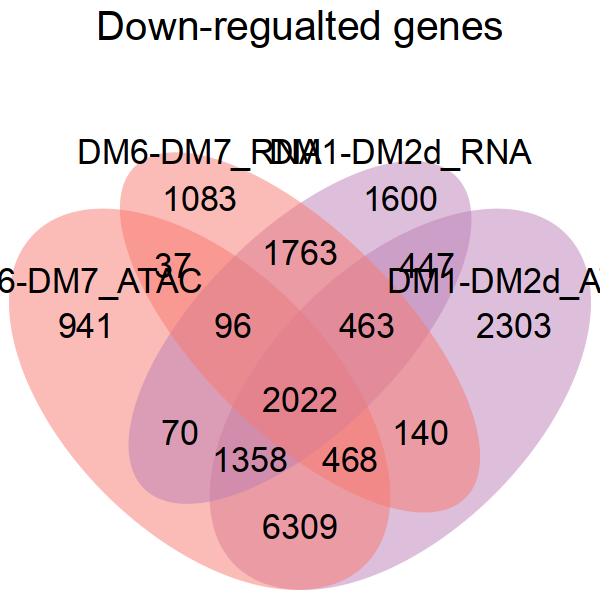

In [87]:
## https://wemp.app/posts/4444f152-32e0-4618-89a4-66a146945410
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 100)


venn_down_genes <- venn.diagram(down_genes, fill = c("#F8766D", '#BC7FB7', "#F8766D", '#BC7FB7'
                                        ),
                  alpha = c(0.5, 0.5, 0.5, 0.5), cat.cex = 2, ## Vector giving the size for each category name
                  cex=2,filename=NULL,  cat.dist = 0.07, # set name distanc to set
                  lty = 'blank', sub.fontfamily = "Helvetica",
                              cat.fontfamily = "Helvetica",
                    main = 'Down-regualted genes',
                        main.pos = c(0.5, 1.1), main.fontface = "plain",
                    main.fontfamily = "Helvetica", main.col = "black",
                    main.cex = 2.4, fontfamily = 'Helvetica',
                  ggplot = T) 


grid.newpage()
grid.draw(venn_down_genes)

# pdf(file="./plots/venn_up_genes.pdf", width = 3, height = 3)
# grid.newpage()
# grid.draw(venn_up_genes)
# dev.off()

# pdf(file="./plots/venn_up_genes_small.pdf", width = 3, height = 2.5)
# grid.newpage()
# grid.draw(venn_up_genes)
# dev.off()

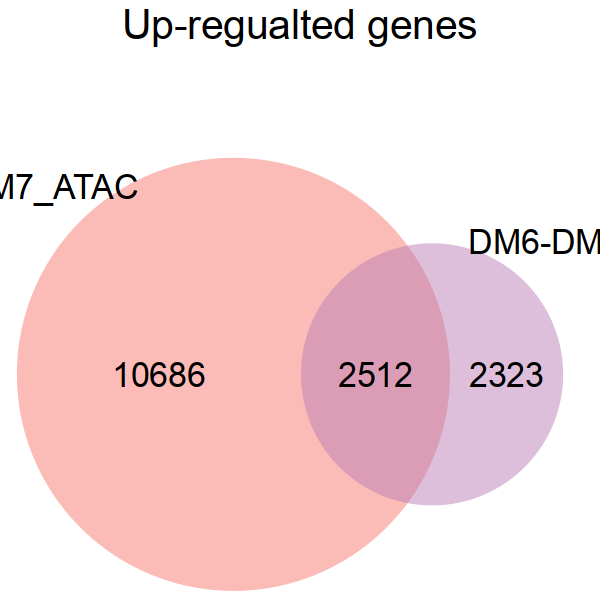

In [88]:
## https://wemp.app/posts/4444f152-32e0-4618-89a4-66a146945410
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 100)


venn_up_genes <- venn.diagram(ups_genes[c(1, 3)], fill = c("#F8766D", '#BC7FB7'
                                        ),
                  alpha = c(0.5, 0.5), cat.cex = 2, ## Vector giving the size for each category name
                  cex=2,filename=NULL,  cat.dist = 0.07, # set name distanc to set
                  lty = 'blank', sub.fontfamily = "Helvetica",
                              cat.fontfamily = "Helvetica",
                    main = 'Up-regualted genes',
                        main.pos = c(0.5, 1.1), main.fontface = "plain",
                    main.fontfamily = "Helvetica", main.col = "black",
                    main.cex = 2.4, fontfamily = 'Helvetica',
                  ggplot = T) 


grid.newpage()
grid.draw(venn_up_genes)

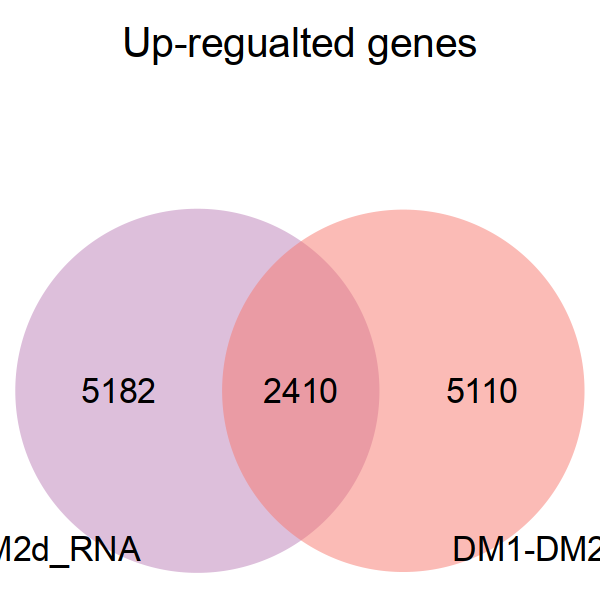

In [89]:
## https://wemp.app/posts/4444f152-32e0-4618-89a4-66a146945410
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 100)


venn_up_genes <- venn.diagram(ups_genes[c(2, 4)], fill = c("#F8766D", '#BC7FB7'
                                        ),
                  alpha = c(0.5, 0.5), cat.cex = 2, ## Vector giving the size for each category name
                  cex=2,filename=NULL,  cat.dist = 0.07, # set name distanc to set
                  lty = 'blank', sub.fontfamily = "Helvetica",
                              cat.fontfamily = "Helvetica",
                    main = 'Up-regualted genes',
                        main.pos = c(0.5, 1.1), main.fontface = "plain",
                    main.fontfamily = "Helvetica", main.col = "black",
                    main.cex = 2.4, fontfamily = 'Helvetica',
                  ggplot = T) 


grid.newpage()
grid.draw(venn_up_genes)

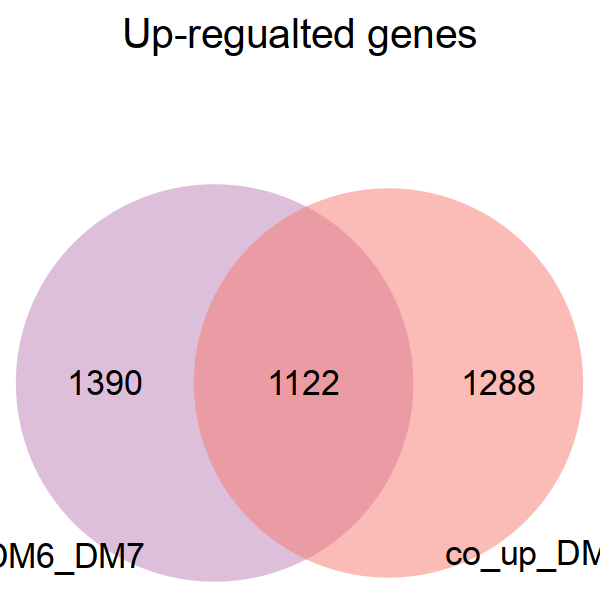

In [90]:
## https://wemp.app/posts/4444f152-32e0-4618-89a4-66a146945410
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 100)

co_up_DM1_DM2d <- ups_genes[[2]] %>% intersect(ups_genes[[4]])

co_up_DM6_DM7 <- ups_genes[[1]] %>% intersect(ups_genes[[3]])
co_up <- list('co_up_DM1_DM2d' = co_up_DM1_DM2d, 'co_up_DM6_DM7' = co_up_DM6_DM7)
venn_up_genes <- venn.diagram(co_up, fill = c("#F8766D", '#BC7FB7'
                                        ),
                  alpha = c(0.5, 0.5), cat.cex = 2, ## Vector giving the size for each category name
                  cex=2,filename=NULL,  cat.dist = 0.07, # set name distanc to set
                  lty = 'blank', sub.fontfamily = "Helvetica",
                              cat.fontfamily = "Helvetica",
                    main = 'Up-regualted genes',
                        main.pos = c(0.5, 1.1), main.fontface = "plain",
                    main.fontfamily = "Helvetica", main.col = "black",
                    main.cex = 2.4, fontfamily = 'Helvetica',
                  ggplot = T) 


grid.newpage()
grid.draw(venn_up_genes)

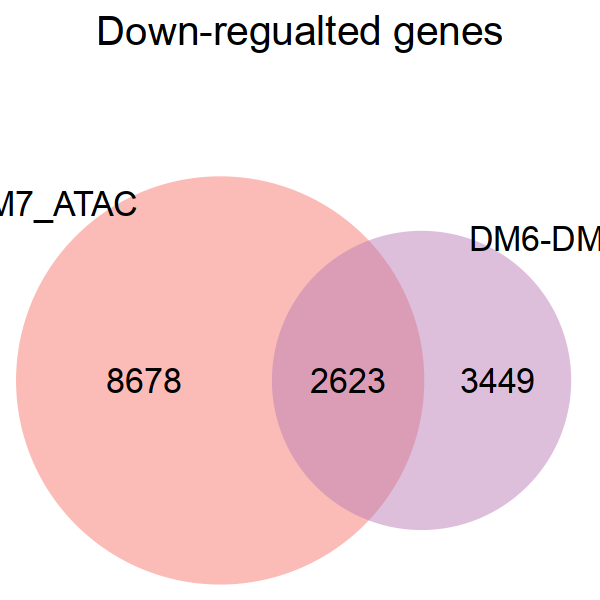

In [91]:
## https://wemp.app/posts/4444f152-32e0-4618-89a4-66a146945410
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 100)


venn_down_genes <- venn.diagram(down_genes[c(1, 3)], fill = c("#F8766D", '#BC7FB7'
                                        ),
                  alpha = c(0.5, 0.5), cat.cex = 2, ## Vector giving the size for each category name
                  cex=2,filename=NULL,  cat.dist = 0.07, # set name distanc to set
                  lty = 'blank', sub.fontfamily = "Helvetica",
                              cat.fontfamily = "Helvetica",
                    main = 'Down-regualted genes',
                        main.pos = c(0.5, 1.1), main.fontface = "plain",
                    main.fontfamily = "Helvetica", main.col = "black",
                    main.cex = 2.4, fontfamily = 'Helvetica',
                  ggplot = T) 


grid.newpage()
grid.draw(venn_down_genes)

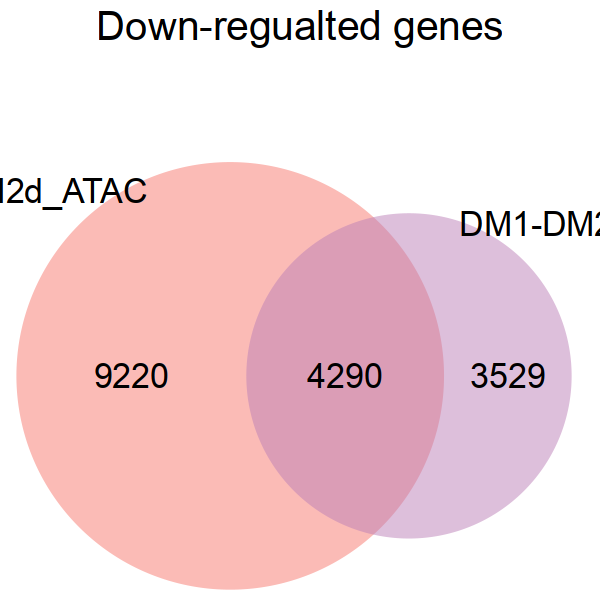

In [92]:
## https://wemp.app/posts/4444f152-32e0-4618-89a4-66a146945410
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 100)


venn_down_genes <- venn.diagram(down_genes[c(2,4)], fill = c("#F8766D", '#BC7FB7'
                                        ),
                  alpha = c(0.5, 0.5), cat.cex = 2, ## Vector giving the size for each category name
                  cex=2,filename=NULL,  cat.dist = 0.07, # set name distanc to set
                  lty = 'blank', sub.fontfamily = "Helvetica",
                              cat.fontfamily = "Helvetica",
                    main = 'Down-regualted genes',
                        main.pos = c(0.5, 1.1), main.fontface = "plain",
                    main.fontfamily = "Helvetica", main.col = "black",
                    main.cex = 2.4, fontfamily = 'Helvetica',
                  ggplot = T) 


grid.newpage()
grid.draw(venn_down_genes)

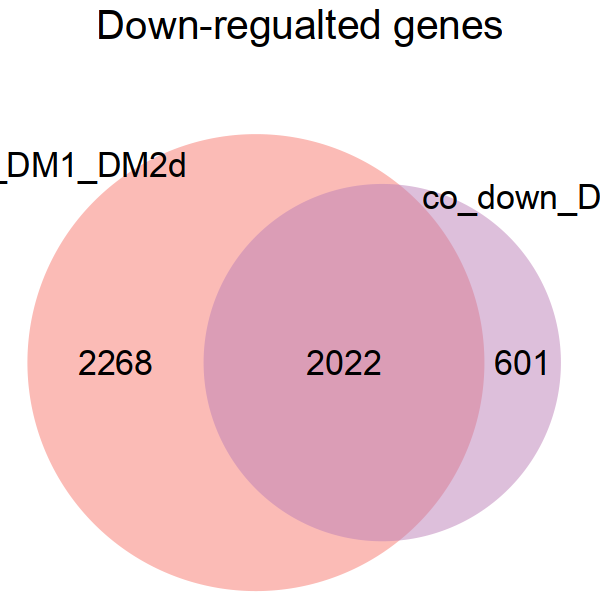

In [93]:
## https://wemp.app/posts/4444f152-32e0-4618-89a4-66a146945410
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 100)

co_down_DM1_DM2d <- down_genes[[2]] %>% intersect(down_genes[[4]])
co_down_DM6_DM7 <- down_genes[[1]] %>% intersect(down_genes[[3]])
co_down <- list('co_down_DM1_DM2d' = co_down_DM1_DM2d, 'co_down_DM6_DM7' = co_down_DM6_DM7)
venn_down_genes <- venn.diagram(co_down, fill = c("#F8766D", '#BC7FB7'
                                        ),
                  alpha = c(0.5, 0.5), cat.cex = 2, ## Vector giving the size for each category name
                  cex=2,filename=NULL,  cat.dist = 0.07, # set name distanc to set
                  lty = 'blank', sub.fontfamily = "Helvetica",
                              cat.fontfamily = "Helvetica",
                    main = 'Down-regualted genes',
                        main.pos = c(0.5, 1.1), main.fontface = "plain",
                    main.fontfamily = "Helvetica", main.col = "black",
                    main.cex = 2.4, fontfamily = 'Helvetica',
                  ggplot = T)

grid.newpage()
grid.draw(venn_down_genes)

## integrate with RNA-seq WGCNA result2

In [94]:
connectivity_table_info %>% nrow

[1] 5454

In [95]:
peakAnno_tb_DM1_DM2d %>% nrow

[1] 31356

In [96]:
#make directory
WGCNA_integrated_dir <- file.path('./', "WGCNA_ATAC_integration")
dir.create(WGCNA_integrated_dir)

Warning message in dir.create(WGCNA_integrated_dir):
“'.//WGCNA_ATAC_integration' already exists”


In [97]:
WGCNA_peaks_DM1_DM2d <- connectivity_table_info %>% left_join(peakAnno_tb_DM1_DM2d, by = c( "gene" = "geneId")) %>%
  filter(!is.na(width))
WGCNA_peaks_DM1_DM2d

gene,connectivity_rowSums_adj,module,gene_name,DM6/DM7,DM1/DM2d,DM10/DM11,AvrRpt2-6h,AvrRpt2-12h,AvrRpt2-20h,⋯,Fold,p.value,FDR,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,distanceToTSS
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
AT1G63720,1954.528,MEcyan,AT1G63720,1.935779,3.970436,6.033027,0.8879107,1.5105686,3.775730,⋯,-0.4064091,2.593965e-07,1.476102e-06,Promoter (<=1kb),1,23635745,23637577,1833,2,699
AT3G54150,1952.888,MEcyan,EFD,3.815566,5.122284,8.439073,1.1571112,3.4107575,5.334764,⋯,0.5206650,5.630124e-08,3.492766e-07,Promoter (<=1kb),3,20050564,20052931,2368,2,0
AT5G48657,1947.970,MEcyan,NOI10,3.501474,4.454391,8.090660,1.0114716,2.2036697,3.545495,⋯,0.2709212,1.657224e-04,6.039474e-04,Promoter (<=1kb),5,19733882,19735726,1845,2,0
AT5G48657,1947.970,MEcyan,NOI10,3.501474,4.454391,8.090660,1.0114716,2.2036697,3.545495,⋯,0.2221302,2.069287e-03,5.910763e-03,Promoter (<=1kb),5,19733882,19735726,1845,2,838
AT4G23700,1947.948,MEcyan,CHX17,6.202520,6.294546,9.241291,0.9000197,3.3214305,6.899931,⋯,1.0004596,2.808698e-32,8.609768e-31,Promoter (<=1kb),4,12342376,12346051,3676,2,-708
AT4G23700,1947.948,MEcyan,CHX17,6.202520,6.294546,9.241291,0.9000197,3.3214305,6.899931,⋯,0.5233637,2.461817e-12,2.367348e-11,Promoter (<=1kb),4,12342376,12346051,3676,2,792
AT4G23700,1947.948,MEcyan,CHX17,6.202520,6.294546,9.241291,0.9000197,3.3214305,6.899931,⋯,0.3829590,7.389948e-08,4.518730e-07,Promoter (2-3kb),4,12342376,12346051,3676,2,2315
AT4G19370,1945.758,MEcyan,MWL-2,1.901460,4.561051,8.419692,1.0427256,2.9706844,4.602999,⋯,0.9487758,3.433409e-15,4.108980e-14,Promoter (<=1kb),4,10566068,10567838,1771,2,0
AT4G19370,1945.758,MEcyan,MWL-2,1.901460,4.561051,8.419692,1.0427256,2.9706844,4.602999,⋯,0.4536977,5.380429e-07,2.933257e-06,Promoter (<=1kb),4,10566068,10567838,1771,2,485


In [98]:
WGCNA_peaks_DM1_DM2d %>% names()

[1] "gene"                     "connectivity_rowSums_adj"
 [3] "module"                   "gene_name"               
 [5] "DM6/DM7"                  "DM1/DM2d"                
 [7] "DM10/DM11"                "AvrRpt2-6h"              
 [9] "AvrRpt2-12h"              "AvrRpt2-20h"             
[11] "AvrRps4-6h"               "AvrRps4-12h"             
[13] "AvrRps4-20h"              "DM1/DM2d_adr1s"          
[15] "Col-0_adr1s"              "DM6/DM7_adr1s"           
[17] "seqnames"                 "start"                   
[19] "end"                      "width"                   
[21] "strand"                   "Conc"                    
[23] "Conc_DM1.DM2d"            "Conc_Col.0_12DAS"        
[25] "Fold"                     "p.value"                 
[27] "FDR"                      "annotation"              
[29] "geneChr"                  "geneStart"               
[31] "geneEnd"                  "geneLength"              
[33] "geneStrand"               "distanceToTSS"

In [99]:
library(ggalluvial)

In [100]:
alluvia_form <- WGCNA_peaks_DM1_DM2d %>% dplyr::select( gene, module, `DM1/DM2d`,Fold) %>% 
  dplyr::rename(gene = gene, module = module, DM1_DM2d_l2FC = `DM1/DM2d`, ATAC_l2FC = Fold)
alluvia_form

gene,module,DM1_DM2d_l2FC,ATAC_l2FC
<chr>,<chr>,<dbl>,<dbl>
AT1G63720,MEcyan,3.970436,-0.4064091
AT3G54150,MEcyan,5.122284,0.5206650
AT5G48657,MEcyan,4.454391,0.2709212
AT5G48657,MEcyan,4.454391,0.2221302
AT4G23700,MEcyan,6.294546,1.0004596
AT4G23700,MEcyan,6.294546,0.5233637
AT4G23700,MEcyan,6.294546,0.3829590
AT4G19370,MEcyan,4.561051,0.9487758
AT4G19370,MEcyan,4.561051,0.4536977


In [101]:
alluvia_form <- alluvia_form %>% group_by(gene, module) %>% filter( abs(ATAC_l2FC) == max(abs(ATAC_l2FC)))

In [102]:
library(dplyr)

# Updating the categorization of the DM1_DM2d_l2FC and ATAC_l2FC columns per module
categorized_df <- alluvia_form %>%
  mutate(DM1_DM2d_category = case_when(
    # DM1_DM2d_l2FC > 2  ~ "> 2",
    DM1_DM2d_l2FC > 1  ~ ">1",
    DM1_DM2d_l2FC > -1 & DM1_DM2d_l2FC <= 1 ~ "-1~1",
    DM1_DM2d_l2FC < -1  ~ "<-1",
    # DM1_DM2d_l2FC < -2 ~ "< -2"
  ),
  ATAC_category = case_when(
    ATAC_l2FC > 1  ~ "4",
    ATAC_l2FC > 0 & ATAC_l2FC <= 1 ~ "3",
    ATAC_l2FC < 0 & ATAC_l2FC >= -1 ~ "2",
    ATAC_l2FC < -1 ~ "1"
  )) %>%
  group_by(module)

# Calculating frequencies per module
frequency_df_per_module <- categorized_df %>%
  count(module, DM1_DM2d_category, ATAC_category)

frequency_df_per_module %>% sample_n(1)

module,DM1_DM2d_category,ATAC_category,n
<chr>,<chr>,<chr>,<int>
MEblue,-1~1,2,126
MEcyan,-1~1,4,2
MEdarkgreen,>1,4,2
MEdarkred,<-1,2,36
MEdarkturquoise,-1~1,3,5
MEgreenyellow,-1~1,3,7
MEmidnightblue,-1~1,2,7
MEpurple,<-1,2,76
MEsalmon,>1,4,3


In [103]:
# Define the order of the levels
levels_order <- c('MEmidnightblue', 'MEdarkgreen', 'MEtan', 'MEsalmon', 
                  'MEgreenyellow', 'MEdarkred', 'MEcyan', 'MEdarkturquoise', 
                  'MEpurple', 'MEblue') %>% rev
categorized_df<- categorized_df %>% ungroup()
categorized_df$module <- factor(categorized_df$module, levels = levels_order)

categorized_df$DM1_DM2d_category <- factor(categorized_df$DM1_DM2d_category, levels = c("<-2", "<-1", "-1~1", ">1", ">2"))


# Convert columns to factors with levels in the desired order
frequency_df_per_module$DM1_DM2d_category <- factor(frequency_df_per_module$DM1_DM2d_category, 
                                                    levels = c("<-2", "<-1", "-1~1", ">1", ">2"))
# frequency_df_per_module$ATAC_category <- factor(frequency_df_per_module$ATAC_category, 
#                                                 levels = c("<-1", "<0", ">0", ">1"))
frequency_df_per_module$module <- factor(frequency_df_per_module$module, 
                                         levels = levels_order)

# Define custom colors for modules
module_colors <- c(
  "MEmidnightblue" = "#E66D2D", #orange #"#F8A71A", # "#0f0954" ,
  "MEdarkgreen" = "#006400",
  "MEtan" = "#d6a25c" , #"#D2B48C",
  "MEsalmon" = "#FA8072",
  "MEgreenyellow" = "#ADFF2F",
  "MEdarkred" = "#8B0000",
  "MEcyan" = "#D6442A", #"#00FFFF",
  "MEdarkturquoise" = "#125b5c", #"#1e6d6e", #"#00CED1",
  "MEpurple" = "#800080", #"#9D81A9", 
  "MEblue" = "#0000FF"
)
frequency_df_per_module %>% sample_n(1)

module,DM1_DM2d_category,ATAC_category,n
<fct>,<fct>,<chr>,<int>
MEblue,<-1,4,1
MEpurple,>1,1,4
MEdarkturquoise,-1~1,3,5
MEcyan,>1,3,609
MEdarkred,<-1,1,11
MEgreenyellow,-1~1,1,3
MEsalmon,>1,2,13
MEtan,>1,2,3
MEdarkgreen,>1,2,25


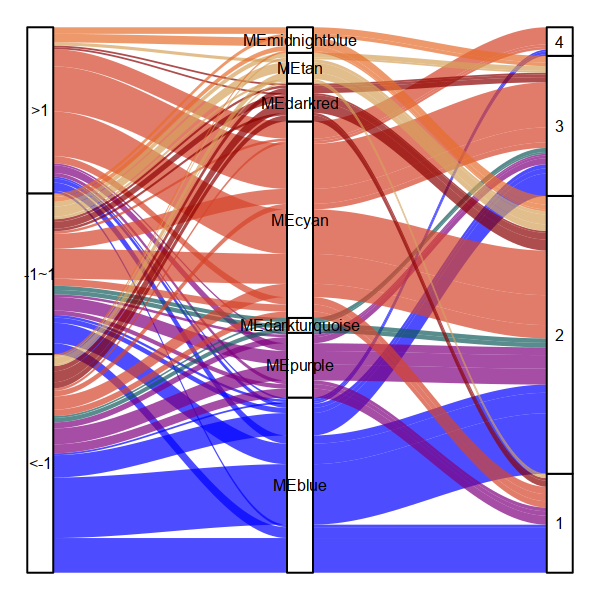

In [104]:
# Alluvial plot with square root scale on the y-axis
Alluvial_plot <- ggplot(frequency_df_per_module %>% filter( module %in% c('MEmidnightblue', 
                                       'MEtan',  'MEdarkred', 'MEcyan', 'MEdarkturquoise', 
                  'MEpurple', 'MEblue')),
     aes(axis1 = DM1_DM2d_category, axis2 = module, axis3 = ATAC_category, y = n)) +
  geom_alluvium(aes(fill = module),  alpha = 0.7,
                width = 1/10, knot.pos = 0, reverse = FALSE, curve_type = "cubic") +
  scale_fill_manual(values = module_colors) +
  guides(fill = "none") +
  geom_stratum(alpha = 1, width = 1/10, reverse = FALSE) +
  geom_text(stat = "stratum", aes(label = after_stat(stratum)),
            reverse = FALSE) +
  # ggtitle("Your Dataset Title Here") + 
  theme_Arial_8() +
  theme_void() +
  scale_y_continuous(trans = 'sqrt') +# Apply square root transformation
  theme(
    axis.title.y = element_blank(), # Remove y-axis title
    axis.text.y = element_blank()   # Remove y-axis text
  )
Alluvial_plot
Alluvial_plot %>% ggsave(filename = "./plots/Alluvial_plot4.pdf", width = 3, height = 2.5)

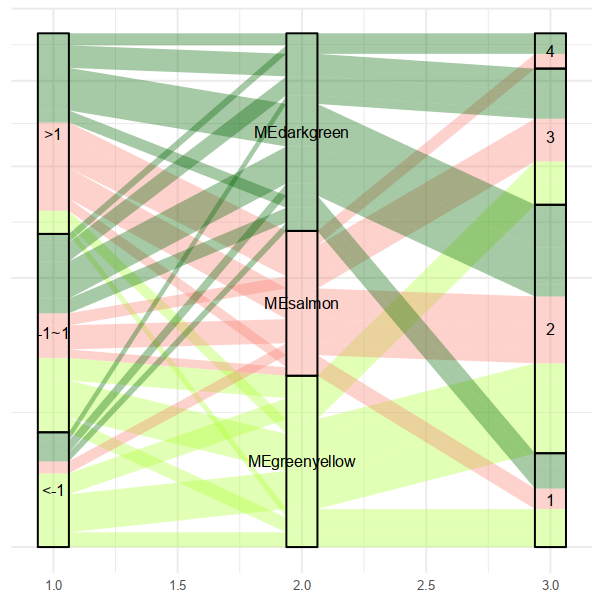

In [105]:
# Alluvial plot with square root scale on the y-axis
Alluvial_plot <- ggplot(frequency_df_per_module %>% filter( 
            module %in% c( 'MEdarkgreen',     'MEgreenyellow',  'MEsalmon')),
     aes(axis1 = DM1_DM2d_category, axis2 = module, axis3 = ATAC_category, y = n)) +
  geom_alluvium(aes(fill = module),  alpha = .35,
                width = 1/8, knot.pos = 0, reverse = FALSE) +
  scale_fill_manual(values = module_colors) +
  guides(fill = "none") +
  geom_stratum(alpha = 0.01, width = 1/8, reverse = FALSE) +
  geom_text(stat = "stratum", aes(label = after_stat(stratum)),
            reverse = FALSE) +
  # ggtitle("Your Dataset Title Here") + 
  # theme_Arial_8() +
  theme_minimal() +
  scale_y_continuous(trans = 'sqrt') +# Apply square root transformation
  theme(
    axis.title.y = element_blank(), # Remove y-axis title
    axis.text.y = element_blank()   # Remove y-axis text
  )
Alluvial_plot
Alluvial_plot %>% ggsave(filename = "./plots/Alluvial_plot2.pdf", width = 4, height = 3)

In [135]:
levels_order <- c('MEmidnightblue', 'MEdarkgreen', 'MEtan', 'MEsalmon', 
                  'MEgreenyellow', 'MEdarkred', 'MEcyan', 'MEdarkturquoise', 
                  'MEpurple', 'MEblue') %>% rev()

# Apply categorization with the updated RNA cuts and ATAC categories
categorized_df <- alluvia_form %>%
  mutate(DM1_DM2d_category = case_when(
    DM1_DM2d_l2FC > 2 ~ ">2",
    DM1_DM2d_l2FC > 1.5 & DM1_DM2d_l2FC <= 2 ~ "1.5~2",
    DM1_DM2d_l2FC > 1 & DM1_DM2d_l2FC <= 1.5 ~ "1~1.5",
    DM1_DM2d_l2FC > 0.5 & DM1_DM2d_l2FC <= 1 ~ "0.5~1",
    DM1_DM2d_l2FC > -0.5 & DM1_DM2d_l2FC <= 0.5 ~ "-0.5~0.5",
    DM1_DM2d_l2FC > -1 & DM1_DM2d_l2FC <= -0.5 ~ "-1~-0.5",
    DM1_DM2d_l2FC > -1.5 & DM1_DM2d_l2FC <= -1 ~ "-1.5~-1",
    DM1_DM2d_l2FC > -2 & DM1_DM2d_l2FC <= -1.5 ~ "-2~-1.5",
    DM1_DM2d_l2FC <= -2 ~ "<-2"
  ),
  ATAC_category = case_when(
    ATAC_l2FC > 1 ~ "4",
    ATAC_l2FC > 0 & ATAC_l2FC <= 1 ~ "3",
    ATAC_l2FC < 0 & ATAC_l2FC >= -1 ~ "2",
    ATAC_l2FC < -1 ~ "1"
  )) %>%
  ungroup()

# Set the factor levels for module and DM1_DM2d_category
categorized_df$module <- factor(categorized_df$module, levels = levels_order)

categorized_df$DM1_DM2d_category <- factor(categorized_df$DM1_DM2d_category, 
                                           levels = c("<-2", "-2~-1.5", "-1.5~-1", "-1~-0.5", "-0.5~0.5", "0.5~1", "1~1.5", "1.5~2", ">2"))

# Calculating frequencies per module
frequency_df_per_module <- categorized_df %>%
  count(module, DM1_DM2d_category, ATAC_category)

# Set the factor levels in frequency_df_per_module
frequency_df_per_module$module <- factor(frequency_df_per_module$module, levels = levels_order)

frequency_df_per_module$DM1_DM2d_category <- factor(frequency_df_per_module$DM1_DM2d_category, 
                                                    levels = c("<-2", "-2~-1.5", "-1.5~-1", "-1~-0.5", "-0.5~0.5", "0.5~1", "1~1.5", "1.5~2", ">2"))

frequency_df_per_module$ATAC_category <- factor(frequency_df_per_module$ATAC_category, 
                                                levels = c("1", "2", "3", "4"))

# Define custom colors for modules
module_colors <- c(
  "MEmidnightblue" = "#E66D2D", #orange 
  "MEdarkgreen" = "#006400",
  "MEtan" = "#d6a25c",
  "MEsalmon" = "#FA8072",
  "MEgreenyellow" = "#ADFF2F",
  "MEdarkred" = "#8B0000",
  "MEcyan" = "#D6442A", 
  "MEdarkturquoise" = "#125b5c",
  "MEpurple" = "#800080", 
  "MEblue" = "#0000FF"
)

# Sampling one random row for preview
frequency_df_per_module %>% sample_n(3)

module,DM1_DM2d_category,ATAC_category,n
<fct>,<fct>,<fct>,<int>
MEpurple,-1~-0.5,1,3
MEtan,-1.5~-1,2,6
MEsalmon,>2,4,3


In [142]:
# Apply categorization with the updated RNA cuts and ATAC categories
categorized_df <- alluvia_form %>%
  mutate(DM1_DM2d_category = case_when(
    DM1_DM2d_l2FC > 2 ~ ">2",
    DM1_DM2d_l2FC > 1 & DM1_DM2d_l2FC <= 2 ~ "1~2",
    DM1_DM2d_l2FC > 0 & DM1_DM2d_l2FC <= 1 ~ "0~1",
    DM1_DM2d_l2FC > -1 & DM1_DM2d_l2FC <= 0 ~ "-1~0",
    DM1_DM2d_l2FC <= -1 & DM1_DM2d_l2FC > -2 ~ "-2~-1",
    DM1_DM2d_l2FC <= -2 ~ "<-2"
  ),
  ATAC_category = case_when(
    ATAC_l2FC > 1 ~ "4",
    ATAC_l2FC > 0 & ATAC_l2FC <= 1 ~ "3",
    ATAC_l2FC < 0 & ATAC_l2FC >= -1 ~ "2",
    ATAC_l2FC < -1 ~ "1"
  )) %>%
  ungroup()

# Set the factor levels for module and DM1_DM2d_category
categorized_df$module <- factor(categorized_df$module, levels = levels_order)

categorized_df$DM1_DM2d_category <- factor(categorized_df$DM1_DM2d_category, 
                                           levels = c("<-2", "-2~-1", "-1~0", "0~1", "1~2", ">2"))

# Calculating frequencies per module
frequency_df_per_module <- categorized_df %>%
  count(module, DM1_DM2d_category, ATAC_category)

# Set the factor levels in frequency_df_per_module
frequency_df_per_module$module <- factor(frequency_df_per_module$module, levels = levels_order)

frequency_df_per_module$DM1_DM2d_category <- factor(frequency_df_per_module$DM1_DM2d_category, 
                                                    levels = c("<-2", "-2~-1", "-1~0", "0~1", "1~2", ">2"))

frequency_df_per_module$ATAC_category <- factor(frequency_df_per_module$ATAC_category, 
                                                levels = c("1", "2", "3", "4"))

# Define custom colors for modules
module_colors <- c(
  "MEmidnightblue" = "#E66D2D", #orange 
  "MEdarkgreen" = "#006400",
  "MEtan" = "#d6a25c",
  "MEsalmon" = "#FA8072",
  "MEgreenyellow" = "#ADFF2F",
  "MEdarkred" = "#8B0000",
  "MEcyan" = "#D6442A", 
  "MEdarkturquoise" = "#125b5c",
  "MEpurple" = "#800080", 
  "MEblue" = "#0000FF"
)

# Sampling one random row for preview
frequency_df_per_module %>% sample_n(3)

module,DM1_DM2d_category,ATAC_category,n
<fct>,<fct>,<fct>,<int>
MEmidnightblue,1~2,3,3
MEcyan,>2,3,490
MEtan,-1~0,3,4


In [157]:
alluvia_form %>% filter(module == 'MEblue') %>% nrow
alluvia_form %>% filter(module == 'MEblue',ATAC_l2FC < 0 ) %>% nrow

[1] 1805

[1] 1638

In [159]:
alluvia_form %>% filter(module == 'MEcyan') %>% nrow
alluvia_form %>% filter(module == 'MEcyan',ATAC_l2FC >0 ) %>% nrow
alluvia_form %>% filter(module == 'MEcyan',ATAC_l2FC <0 ) %>% nrow

[1] 1736

[1] 777

[1] 959

In [151]:
frequency_df_per_module %>% filter( module == 'MEblue', ATAC_category %in% c(1,2))

module,DM1_DM2d_category,ATAC_category,n
<fct>,<fct>,<fct>,<int>
MEblue,<-2,1,307
MEblue,<-2,2,897
MEblue,-2~-1,1,53
MEblue,-2~-1,2,198
MEblue,-1~1,1,35
MEblue,-1~1,2,126
MEblue,1~2,1,1
MEblue,1~2,2,13
MEblue,>2,1,1


In [144]:
# Apply categorization with the updated RNA cuts and ATAC categories
categorized_df <- alluvia_form %>%
  mutate(DM1_DM2d_category = case_when(
    DM1_DM2d_l2FC > 2 ~ ">2",
    DM1_DM2d_l2FC > 1 & DM1_DM2d_l2FC <= 2 ~ "1~2",
    DM1_DM2d_l2FC > -1 & DM1_DM2d_l2FC <= 1 ~ "-1~1",
    DM1_DM2d_l2FC > -2 & DM1_DM2d_l2FC <= -1 ~ "-2~-1",
    DM1_DM2d_l2FC <= -2 ~ "<-2"
  ),
  ATAC_category = case_when(
    ATAC_l2FC > 1 ~ "4",
    ATAC_l2FC > 0 & ATAC_l2FC <= 1 ~ "3",
    ATAC_l2FC < 0 & ATAC_l2FC >= -1 ~ "2",
    ATAC_l2FC < -1 ~ "1"
  )) %>%
  ungroup()

# Set the factor levels for module and DM1_DM2d_category
categorized_df$module <- factor(categorized_df$module, levels = levels_order)

categorized_df$DM1_DM2d_category <- factor(categorized_df$DM1_DM2d_category, 
                                           levels = c("<-2", "-2~-1", "-1~1", "1~2", ">2"))

# Calculating frequencies per module
frequency_df_per_module <- categorized_df %>%
  count(module, DM1_DM2d_category, ATAC_category)

# Set the factor levels in frequency_df_per_module
frequency_df_per_module$module <- factor(frequency_df_per_module$module, levels = levels_order)

frequency_df_per_module$DM1_DM2d_category <- factor(frequency_df_per_module$DM1_DM2d_category, 
                                                    levels = c("<-2", "-2~-1", "-1~1", "1~2", ">2"))

frequency_df_per_module$ATAC_category <- factor(frequency_df_per_module$ATAC_category, 
                                                levels = c("1", "2", "3", "4"))

# Define custom colors for modules
module_colors <- c(
  "MEmidnightblue" = "#E66D2D", #orange 
  "MEdarkgreen" = "#006400",
  "MEtan" = "#d6a25c",
  "MEsalmon" = "#FA8072",
  "MEgreenyellow" = "#ADFF2F",
  "MEdarkred" = "#8B0000",
  "MEcyan" = "#D6442A", 
  "MEdarkturquoise" = "#125b5c",
  "MEpurple" = "#800080", 
  "MEblue" = "#0000FF"
)

# Sampling one random row for preview
frequency_df_per_module %>% sample_n(3)

module,DM1_DM2d_category,ATAC_category,n
<fct>,<fct>,<fct>,<int>
MEdarkgreen,-2~-1,3,1
MEdarkred,<-2,2,28
MEmidnightblue,-1~1,3,4


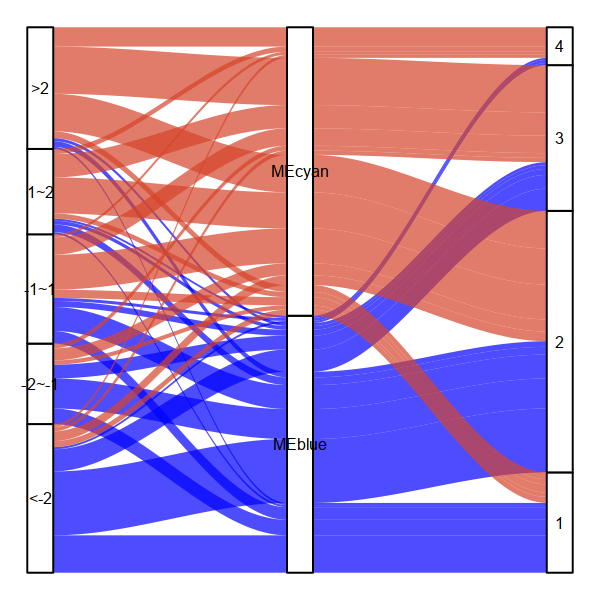

In [145]:
# Alluvial plot with square root scale on the y-axis
Alluvial_plot <- ggplot(frequency_df_per_module %>% filter( module %in% c( 'MEcyan',  'MEblue')),
     aes(axis1 = DM1_DM2d_category, axis2 = module, axis3 = ATAC_category, y = n)) +
  geom_alluvium(aes(fill = module),  alpha = 0.7,
                width = 1/10, knot.pos = 0, reverse = FALSE, curve_type = "cubic") +
  scale_fill_manual(values = module_colors) +
  guides(fill = "none") +
  geom_stratum(alpha = 1, width = 1/10, reverse = FALSE) +
  geom_text(stat = "stratum", aes(label = after_stat(stratum)),
            reverse = FALSE) +
  # ggtitle("Your Dataset Title Here") + 
  theme_Arial_8() +
  theme_void() +
  scale_y_continuous(trans = 'sqrt') +# Apply square root transformation
  theme(
    axis.title.y = element_blank(), # Remove y-axis title
    axis.text.y = element_blank()   # Remove y-axis text
  )
Alluvial_plot
Alluvial_plot %>% ggsave(filename = "./plots/Alluvial_plot6.pdf", width = 2.2, height = 2.35)

In [106]:
non_variable_peaks_in_RNA_seq <- peakAnno_tb_DM1_DM2d %>% anti_join(connectivity_table_info, by = c(  "geneId" = "gene" ))

In [107]:
non_variable_peaks_in_RNA_seq

seqnames,start,end,width,strand,Conc,Conc_DM1.DM2d,Conc_Col.0_12DAS,Fold,p.value,FDR,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,distanceToTSS
<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
5,5236541,5237157,617,*,10.907429,9.407313,11.62681,-2.200833,6.458652e-278,1.128504e-273,Promoter (<=1kb),5,5236634,5236879,246,1,AT5G02495,0
3,7104355,7104488,134,*,10.252167,8.418776,11.03407,-2.588420,1.021448e-256,8.923750e-253,Promoter (<=1kb),3,7103817,7104250,434,1,AT3G20362,538
5,17828736,17829549,814,*,11.143519,9.809886,11.82450,-1.997740,3.602299e-250,2.517683e-246,Promoter (1-2kb),5,17829618,17831336,1719,2,AT5G44260,1787
2,17504350,17505043,694,*,10.551486,8.694952,11.33713,-2.614031,5.171034e-250,3.285534e-246,Promoter (<=1kb),2,17504551,17504932,382,2,AT2G09320,0
1,8598368,8599538,1171,*,11.514378,10.492546,12.10655,-1.601076,2.816934e-228,1.514449e-224,Promoter (<=1kb),1,8598624,8598990,367,1,AT1G05863,0
3,20476348,20477017,670,*,10.578722,9.342335,11.23459,-1.875313,2.816925e-222,1.312518e-218,Promoter (<=1kb),3,20476616,20477183,568,1,AT3G08455,0
5,24482142,24482862,721,*,11.402899,10.173738,12.05682,-1.865062,1.917225e-208,7.882161e-205,Promoter (<=1kb),5,24482215,24482821,607,2,AT5G08975,0
4,17468933,17469652,720,*,10.430811,9.125355,11.10474,-1.957433,2.529104e-206,8.417220e-203,Promoter (1-2kb),4,17464594,17467186,2593,2,AT4G37070,-1747
5,21733558,21735701,2144,*,11.491128,10.666926,12.01239,-1.337571,1.158997e-201,3.521889e-198,Distal Intergenic,5,21738849,21742082,3234,1,AT5G53510,-3148


In [108]:
require(openxlsx)

wb <- createWorkbook()
for (i in WGCNA_peaks_DM1_DM2d %>% pull(module) %>% unique) {
#     print(i)
    addWorksheet(wb, i)
    writeData(wb, i, WGCNA_peaks_DM1_DM2d %>% filter(module == i))
    
}
saveWorkbook(wb, file = paste0(file.path(WGCNA_integrated_dir, "connectivity_and_peak_info_DM1_DM2d.xlsx")), overwrite = T)
WGCNA_peaks_DM1_DM2d %>% saveRDS(file.path(WGCNA_integrated_dir, "connectivity_and_peak_info_DM1_DM2d.rds"))

Loading required package: openxlsx



In [109]:
non_variable_peaks_in_RNA_seq %>% saveRDS(file.path(WGCNA_integrated_dir, "non_variable_peaks_in_RNA_seq.rds"))

In [110]:
NLRs_and_TIRs <- read.csv(file = "../gene_table_and_other_scripts/NLRs_and_TIR_only.csv") 

In [111]:
NLRs_and_TIRs <- NLRs_and_TIRs %>% dplyr::select(AGI, Class) 

In [112]:
NLRs_and_TIRs %>% filter(Class != 'TIR') %>% filter(Class != 'P-loop') 

AGI,Class
<chr>,<chr>
AT1G10920,NBS-LRR
AT1G12210,CC-NBS-LRR
AT1G12220,CC-NBS-LRR
AT1G12280,CC-NBS-LRR
AT1G12290,CC-NBS-LRR
AT1G15890,CC-NBS-LRR
AT1G17600,TIR-NBS-LRR
AT1G17610,TIR-NBS
AT1G17615,TIR-NBS


In [113]:
Pathways_Ngou_2021 <- readxl::read_excel("../gene_table_and_other_scripts/Ngou_2021_Nature_figure2E_pathways_mod.xlsx")

In [114]:
Pathways <- Pathways_Ngou_2021 %>% dplyr::select(Target, GeneFamily)
Pathways <- Pathways %>%as.data.frame  %>% dplyr::rename('AGI' = 'Target')
LRRs <- Pathways %>% filter(GeneFamily %>% str_detect('LRR'))

In [115]:
NLRs_and_LRRs <- LRRs %>% dplyr::rename('subClass' = 'GeneFamily') %>% mutate(Class = 'LRR') %>% rbind(
    NLRs_and_TIRs %>% dplyr::rename('subClass' = 'Class') %>% mutate(Class =
                        case_when(subClass == 'TIR' ~ 'TIR', 
                                  subClass == 'P-loop' ~ 'P-loop',
                        .default = 'NLR')))

In [116]:
LRRs %>% dplyr::rename('subClass' = 'GeneFamily') %>% mutate(Class = 'LRR') %>% rbind(
    NLRs_and_TIRs %>% dplyr::rename('subClass' = 'Class') %>% mutate(Class =
                        case_when(subClass == 'TIR' ~ 'TIR', 
                                  subClass == 'P-loop' ~ 'P-loop',
                        .default = 'NLR'))) %>% 
    left_join(peakAnno_tb_DM1_DM2d, by = c("AGI" = "geneId")) %>% filter(!is.na(Fold)) %>%
    dplyr::select(-c(geneChr,geneStart,geneEnd,geneLength)) -> peakAnno_tb_DM1_DM2d_NLR_LRRs

In [117]:
Res_combined <-  readRDS('../Pathogen_JC14_3DM//Rdata/Res_combined.rds')
Res_DM1_DM2d <- Res_combined %>% filter(source == 'DM1/DM2d') %>% dplyr::select(AGI, log2FC) %>%
        dplyr::rename('log2FC_RNA_DM1_DM2d' = 'log2FC')
Res_DM1_DM2d

AGI,log2FC_RNA_DM1_DM2d
<chr>,<dbl>
AT1G30814,5.34709645
AT1G78930,-1.81755175
AT1G71695,-3.32325530
AT1G58983,0.72508641
AT1G12980,0.22628926
AT1G56250,-0.97835493
AT1G66852,1.46423313
AT1G69810,1.88695386
AT1G72450,-0.05759434


In [118]:
peakAnno_tb_DM1_DM2d_NLR_LRRs <- peakAnno_tb_DM1_DM2d_NLR_LRRs %>% left_join(Res_DM1_DM2d, by = c("AGI")) %>%
    filter(!is.na(log2FC_RNA_DM1_DM2d)) 

In [119]:
peakAnno_tb_DM1_DM2d_NLR_LRRs %>% saveRDS(file.path('./NLRs_LRRs', "peakAnno_tb_DM1_DM2d_NLR_LRRs.rds"))

In [120]:
NLRs_and_LRRs %>% saveRDS(file.path('./NLRs_LRRs', "NLRs_and_LRRs_list.rds"))

In [121]:
NLRs_and_TIRs <- read.csv(file = "../gene_table_and_other_scripts/NLRs_and_TIR_only.csv") 

In [122]:
TIR_containing <-  NLRs_and_TIRs %>% dplyr::filter( Class %>% str_detect("TIR"))
TIR_containing %>% nrow

[1] 136

In [123]:
TIR_containing

AGI,Class,Symbol,Organization
<chr>,<chr>,<chr>,<chr>
AT1G09665,TIR,AT1G09665,NA
AT1G47370,TIR,AT1G47370,NA
AT1G51270,TIR,AT1G51270,NA
AT1G52900,TIR,AT1G52900,NA
AT1G57630,TIR,AT1G57630,NA
AT1G57670,TIR,AT1G57670,NA
AT1G57830,TIR,AT1G57830,NA
AT1G57850,TIR,AT1G57850,NA
AT1G60320,TIR,AT1G60320,NA


In [124]:
peakAnno_tb_DM1_DM2d_TIRs <- peakAnno_tb_DM1_DM2d %>% filter( geneId %in% TIR_containing$AGI)

In [125]:
peakAnno_tb_DM1_DM2d_TIRs %>% saveRDS(file.path('./TIRs', "peakAnno_tb_DM1_DM2d_TIRs.rds"))